# Energy in South East Asia Prediction

For this project, we will use the [Global Data on Sustainable Energy ](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy) from Kaggle.
This data is consisted of


* **Entity**: The name of the country or region for which the data is reported
* **Year**: The year for which the data is reported, ranging from 2000 to 2020.
* **Access to electricity (% of population)**: The percentage of population with access to electricity.
* **Access to clean fuels for cooking (% of population)**: The percentage of the population with primary reliance on clean fuels
* **Renewable-electricity-generating-capacity-per-capita**: Installed Renewable energy capacity per person
* **Financial flows to developing countries (USD**): Aid and assistance from developed countries for clean energy projects.
* **Renewable energy share in total final energy consumption (%)**: Percentage of renewable energy in final energy consumption.
* **Electricity from fossil fuels (TWh)**: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
* **Electricity from nuclear (TWh)**: Electricity generated from nuclear power in terawatt-hours.
* **Electricity from renewables (TWh)**: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
* **Low-carbon electricity (% electricity)**: Percentage of electricity from low-carbon sources (nuclear and renewables).
* **Primary energy consumption per capita (kWh/person)**: Energy consumption per person in kilowatt-hours.
* **Energy intensity level of primary energy (MJ/$2011 PPP GDP)**: Energy use per unit of GDP at purchasing power parity.
* **Value_co2_emissions (metric tons per capita)**: Carbon dioxide emissions per person in metric tons.
* **Renewables (% equivalent primary energy)** : Equivalent primary energy that is derived from renewable sources.
* **GDP growth (annual %)**: Annual GDP growth rate based on constant local currency.
* **GDP per capita**: Gross domestic product per person.
* **Density (P/Km2)**: Population density in persons per square kilometer.
* **Land Area (Km2)**: Total land area in square kilometers.
* **Latitude**: Latitude of the country's centroid in decimal degrees.
* **Longitude**: Longitude of the country's centroid in decimal degrees.

The output of this project should be the Renewable energy share in total final energy consumption per country per year




### **Importing Data Preparation**

For simplicity and local resource management purposes, we will run this notebook through Google Colab and directly importing the dataset we need from kaggle

Below is the code to set up the kaggle permissions using private API key (please upload your own key from Kaggle if you want to re run this notebook)

**For privacy and security purpose, this cell code has been commented out**

**Uncomment this cell code after importing your own kaggle.json to your local Google Colab runtime**





In [1]:
# from google.colab import files
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# # files.upload()
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle
# !ls -l ~/.kaggle
# !cat ~/.kaggle/kaggle.json

In [2]:
# !kaggle datasets download -d anshtanwar/global-data-on-sustainable-energy

In [3]:
# !unzip -q /content/global-data-on-sustainable-energy.zip

### **Import Libraries**

Below are all libraries that we will need to run this notebook.

**Some libraries might differ than the ones used for deployment purposes.**

Please refer to the separate requirements.txt if you want to see libraries that are used for deployment

In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import kendalltau, spearmanr
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
import matplotlib.cm as cm
import matplotlib.image as mpimg

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as pyo
from plotly.subplots import make_subplots
from plotly.offline import plot
pio.templates.default = "plotly_white"

import datetime
import calendar

import json
import pickle

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500) #using this line of code to make sure all columns from dataset are being displayed

### **Data Loading**

Having already importing all necessary data from Kaggle to local Google Colab runtime, we can directly load the dataset to this notebook

In [5]:
df = pd.read_csv('global-data-on-sustainable-energy.csv')

Showing the first 3 rows of the data so we can get a general grasp of how our data looks like

In [6]:
df.head(3)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000.0,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001.0,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002.0,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953


**WARNING**

So here, I have done one thing before I import the data to this notebook.
Previously, there is a column called `Density\n(P/Km2)` in the dataset that is causing some problems during EDA and somehow I cannot change the column name.
So I downloaded my csv from Google Colab and manually change my column name from `Density\n(P/Km2)` to `Desnity(P/Km2)` in Microsoft Excel

Here I see lots of our column names are being separated with spaces, whereas this might bear some difficulties for us when calling the columns during the might be needed data manipulation or feature engineering later.

So I changed the column names with dashes and apply lowercasing to all column names in order to create simplicity for later purposes.

However, I  see that for columns

* value_co2_emissions_kt_by_country
* gdp_growth
* gdp_per_capita

are still using underscores (_) instead of dash (-)

I will change it to dash as well

In [7]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(' ', '-')
    .str.replace('_', '-')
)

Checking the first three rows again to make sure the above changes are successfully applied

In [8]:
df.head(3)

,entity,year,access-to-electricity-(%-of-population),access-to-clean-fuels-for-cooking,renewable-electricity-generating-capacity-per-capita,financial-flows-to-developing-countries-(us-$),renewable-energy-share-in-the-total-final-energy-consumption-(%),electricity-from-fossil-fuels-(twh),electricity-from-nuclear-(twh),electricity-from-renewables-(twh),low-carbon-electricity-(%-electricity),primary-energy-consumption-per-capita-(kwh/person),energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),value-co2-emissions-kt-by-country,renewables-(%-equivalent-primary-energy),gdp-growth,gdp-per-capita,density(p/km2),land-area(km2),latitude,longitude
0,Afghanistan,2000.0,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001.0,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002.0,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953


Now I'm checking the last 3 rows of our data to see how are the data looks like below

In [9]:
df.tail(3)

,entity,year,access-to-electricity-(%-of-population),access-to-clean-fuels-for-cooking,renewable-electricity-generating-capacity-per-capita,financial-flows-to-developing-countries-(us-$),renewable-energy-share-in-the-total-final-energy-consumption-(%),electricity-from-fossil-fuels-(twh),electricity-from-nuclear-(twh),electricity-from-renewables-(twh),low-carbon-electricity-(%-electricity),primary-energy-consumption-per-capita-(kwh/person),energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),value-co2-emissions-kt-by-country,renewables-(%-equivalent-primary-energy),gdp-growth,gdp-per-capita,density(p/km2),land-area(km2),latitude,longitude
3646,Zimbabwe,2018.0,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,59.412407,3441.9858,9.83,12380.00011,NaN,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019.0,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,55.582527,3003.6553,10.47,11760.00023,NaN,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857
3648,Zimbabwe,2020.0,52.747670,30.4,80.61,30000.0,81.90,3.40,0.0,4.19,55.204216,2680.1318,10.00,NaN,NaN,-6.248748,1214.509820,38.0,390757.0,-19.015438,29.154857


It seems like our data is consisted of 3646 rows and particularly for columns `year` , `access-to-electricity-(%-of-population)` , and `access-to-clean-fuels-for-cooking	renewable-electricity-generating-capacity-per-capita` are sorted in Ascending format.

Whereas columns `density` and `land-area(km2)` are sorted in Descending format.

But this perspective might change later as we explore deeper to the data.

### **Exploratory Data Analysis**

We will start this part in making a copy of our data.

Since there might be lots of data manipulations during the Exploratory Data Analysis, in order to preserve our original state of data (making sure no data manipulation not directly linked to Modeling is not contaminating our data) we will do our EDA in the copy of our original data

In [10]:
df_eda = df.copy()

In [11]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   entity                                                            3649 non-null   object 
 1   year                                                              3544 non-null   float64
 2   access-to-electricity-(%-of-population)                           3534 non-null   float64
 3   access-to-clean-fuels-for-cooking                                 3375 non-null   float64
 4   renewable-electricity-generating-capacity-per-capita              2634 non-null   float64
 5   financial-flows-to-developing-countries-(us-$)                    1529 non-null   float64
 6   renewable-energy-share-in-the-total-final-energy-consumption-(%)  3355 non-null   float64
 7   electricity-from-fossil-fuels-(tw

Here we see that sans for **entity**, **density** , and **year** all of our data are in float64 format

I will see how our density column look like and change the format of the column if necessary.

Since the definition of density is **Population density in persons per square kilometer** I don't think it is appropriate to have `object` as the data type

In [12]:
# Accessing the renamed column
density_column = df_eda['density(p/km2)']

# Getting unique values
unique_values = density_column.unique()

# Displaying unique values
print(unique_values)


[  60.  105.   18.   26.  223.   17.  104.  590.    3.  109.  123.   41.
   nan  668.   47.  383.  108. 1281.   20.   64.    4.   25.   76.  463.
   95.   56.  274.    8.   13.  153.   46.  467.  100.   73.  106.  131.
  136.  137.   43.   96.  225.   71.  103.  313.   50.   35.   31.   67.
  115.   49.  119.    9.  239.   57.  240.   81.  331.  167.   53.   70.
  414.   89.  107.  464.  151.   93.  400.  206.  273.  347.    7.   94.
  147.   34.   30.  667.  242.   48.  203.   99.    5.  626.   66.    2.
   83.   40.  541.  508.   16.   55.   19.  226.   15.  287.   58.  368.
  124.  111.  248.   84.  525.  205.  301.  284.   87.  214.  114.  341.
  219.   68.  152.  110.  393.  229.   75.  118.  281.   36.   79.   38.]


I see there is `nan` value in `density(p/km2)` column. This `nan` value is **NOT** a standard NaN value from Numpy but instead a string.
This value is what made this column type to be `Object`.

I will change the `nan` in string to `NaN` in standard Numpy format and then change the type of `density(p/km2)` to `float64`

In [13]:
#Changing 'nan' to standard Numpy 'NaN'
df_eda['density(p/km2)'] = df['density(p/km2)'].replace('nan', np.nan)

In [14]:
#Changing type from 'Object' to 'Float64'
df_eda['density(p/km2)'] = df['density(p/km2)'].astype(float)

In [15]:
#Checking the unique values from density(p/km2) column
# Accessing the renamed column
density_column = df_eda['density(p/km2)']

# Getting unique values
unique_values = density_column.unique()

# Displaying unique values
print(unique_values)

[  60.  105.   18.   26.  223.   17.  104.  590.    3.  109.  123.   41.
   nan  668.   47.  383.  108. 1281.   20.   64.    4.   25.   76.  463.
   95.   56.  274.    8.   13.  153.   46.  467.  100.   73.  106.  131.
  136.  137.   43.   96.  225.   71.  103.  313.   50.   35.   31.   67.
  115.   49.  119.    9.  239.   57.  240.   81.  331.  167.   53.   70.
  414.   89.  107.  464.  151.   93.  400.  206.  273.  347.    7.   94.
  147.   34.   30.  667.  242.   48.  203.   99.    5.  626.   66.    2.
   83.   40.  541.  508.   16.   55.   19.  226.   15.  287.   58.  368.
  124.  111.  248.   84.  525.  205.  301.  284.   87.  214.  114.  341.
  219.   68.  152.  110.  393.  229.   75.  118.  281.   36.   79.   38.]


In [16]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   entity                                                            3649 non-null   object 
 1   year                                                              3544 non-null   float64
 2   access-to-electricity-(%-of-population)                           3534 non-null   float64
 3   access-to-clean-fuels-for-cooking                                 3375 non-null   float64
 4   renewable-electricity-generating-capacity-per-capita              2634 non-null   float64
 5   financial-flows-to-developing-countries-(us-$)                    1529 non-null   float64
 6   renewable-energy-share-in-the-total-final-energy-consumption-(%)  3355 non-null   float64
 7   electricity-from-fossil-fuels-(tw

In [17]:
df_eda.head()

,entity,year,access-to-electricity-(%-of-population),access-to-clean-fuels-for-cooking,renewable-electricity-generating-capacity-per-capita,financial-flows-to-developing-countries-(us-$),renewable-energy-share-in-the-total-final-energy-consumption-(%),electricity-from-fossil-fuels-(twh),electricity-from-nuclear-(twh),electricity-from-renewables-(twh),low-carbon-electricity-(%-electricity),primary-energy-consumption-per-capita-(kwh/person),energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),value-co2-emissions-kt-by-country,renewables-(%-equivalent-primary-energy),gdp-growth,gdp-per-capita,density(p/km2),land-area(km2),latitude,longitude
0,Afghanistan,2000.0,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001.0,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002.0,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003.0,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004.0,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


#### **Total Electricity Generation**

In our data there are columns :
1. electricity-from-fossil-fuels-(twh)
2. electricity-from-renewables-(twh)

We are going to explore how much electricity are being generated by each countries from both Fossil Fuels and Renewable Energy

In [18]:
el_gen_glob = df_eda[['entity', 'year', 'electricity-from-fossil-fuels-(twh)', 'electricity-from-nuclear-(twh)', 'electricity-from-renewables-(twh)']]
el_gen_glob.head()

,entity,year,electricity-from-fossil-fuels-(twh),electricity-from-nuclear-(twh),electricity-from-renewables-(twh)
0,Afghanistan,2000.0,0.16,0.0,0.31
1,Afghanistan,2001.0,0.09,0.0,0.50
2,Afghanistan,2002.0,0.13,0.0,0.56
3,Afghanistan,2003.0,0.31,0.0,0.63
4,Afghanistan,2004.0,0.33,0.0,0.56


Since Afghanistan is on the first five rows of the table, we can see that Afghanistan has higher number of electricity generated from renewables compared to electricity generated from fossil fuels

In [19]:
el_gen_glob_sum = el_gen_glob[['entity', 'year', 'electricity-from-fossil-fuels-(twh)', 'electricity-from-renewables-(twh)']]
el_gen_glob_sum.fillna(0, inplace=True)
el_gen_glob_sum['total-electricity'] = el_gen_glob_sum['electricity-from-fossil-fuels-(twh)'] + el_gen_glob_sum['electricity-from-renewables-(twh)']
el_gen_glob_sum.head()

,entity,year,electricity-from-fossil-fuels-(twh),electricity-from-renewables-(twh),total-electricity
0,Afghanistan,2000.0,0.16,0.31,0.47
1,Afghanistan,2001.0,0.09,0.50,0.59
2,Afghanistan,2002.0,0.13,0.56,0.69
3,Afghanistan,2003.0,0.31,0.63,0.94
4,Afghanistan,2004.0,0.33,0.56,0.89


We will now check whether all of other countries also has higher number of electricity generated from renewables compared to electricity generated from fossil fuels

In [20]:
# Set the display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Show up to 100 rows
pd.set_option('display.max_columns', None)  # Show all columns

#Filter for countries where electricity generated from renewable is higher than from fossil fuels
renewable_fuel_dominant_countries = el_gen_glob_sum[el_gen_glob_sum['electricity-from-renewables-(twh)'] > el_gen_glob_sum['electricity-from-fossil-fuels-(twh)']]

#Group by 'Entity' and aggregate the years into a list
grouped = renewable_fuel_dominant_countries.groupby('entity')['year'].apply(list).reset_index()

#Convert the list of years to a comma-separated string
grouped['year'] = grouped['year'].apply(lambda x: ', '.join(map(str, x)))

#Create the DataFrame with the final result
result_df = pd.DataFrame(grouped, columns=['entity', 'year'])

#Rename the columns for clarity
result_df.columns = ['country', 'years']

result_df

,country,years
0,Afghanistan,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0..."
1,Albania,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0..."
2,Angola,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0..."
3,Armenia,"2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0..."
4,Austria,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0..."
5,Belize,"2001.0, 2002.0, 2006.0, 2007.0, 2008.0, 2009.0..."
6,Bhutan,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0..."
7,Bosnia and Herzegovina,"2000.0, 2002.0"
8,Brazil,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0..."
9,Burundi,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0..."


We can see that although not all, but lots of countries in the list actually have electricity generated from renewables in higher number than from fossil fuels. Surprisingly enough, first world countries such as Australia, Canada, France, Germany, Italy, Japan, New Zealand, Norway, the United Kingdom, and the US are not dominating this table.

In [21]:
first_world_countries = [
    'Australia', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 
    'New Zealand', 'Norway', 'United Kingdom', 'United States'
]

#Filter the result_df to only show the first world countries
filtered_result_df = result_df[result_df['country'].isin(first_world_countries)]

# Set display options to avoid truncation
pd.set_option('display.max_colwidth', None)

filtered_result_df

,country,years
12,Canada,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0"
26,France,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0"
29,Germany,2020.0
51,New Zealand,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0"
53,Norway,"2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0"
73,United Kingdom,2020.0


From all 12 first world countries only six of them are listed as the country where they generate more electricity from renewable energy. 

Even for Germany and the UK, they only have this as a one time occurence in 2020

Below are the percentage for each portion of energy generated from both renewable and fossil fuels

In [22]:
#Selecting specific columns and resetting the index
el_gen_portion = el_gen_glob_sum[['entity', 'year', 'electricity-from-fossil-fuels-(twh)', 'electricity-from-renewables-(twh)', 'total-electricity']].reset_index(drop=True)

#Calculate the percentage portion of electricity generated from renewables and fossil fuels
el_gen_portion['renewable-generated'] = (el_gen_portion['electricity-from-renewables-(twh)']/el_gen_portion['total-electricity']) * 100
el_gen_portion['fossil-generated'] = (el_gen_portion['electricity-from-fossil-fuels-(twh)']/el_gen_portion['total-electricity']) * 100

el_gen_portion.head()

,entity,year,electricity-from-fossil-fuels-(twh),electricity-from-renewables-(twh),total-electricity,renewable-generated,fossil-generated
0,Afghanistan,2000.0,0.16,0.31,0.47,65.957447,34.042553
1,Afghanistan,2001.0,0.09,0.50,0.59,84.745763,15.254237
2,Afghanistan,2002.0,0.13,0.56,0.69,81.159420,18.840580
3,Afghanistan,2003.0,0.31,0.63,0.94,67.021277,32.978723
4,Afghanistan,2004.0,0.33,0.56,0.89,62.921348,37.078652


Now, since we are focusing on South East Asia countries, we will also specifically see how the electricity generation is in Brunei, Burma, Myanmar, Cambodia, Timor-Leste, Indonesia, Laos, Malaysia, Philippines, Singapore, Thailad, and Vietnam

In [23]:
sea_countries = [
    'Brunei', 'Burma', 'Myanmar', 'Cambodia', 'Timor-Leste', 'Indonesia',
    'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Filter data for SEA Countries
el_gen_sea_sum = el_gen_glob[el_gen_glob['entity'].isin(sea_countries)].copy()

#Fill NaN values with 0
el_gen_sea_sum.fillna(0, inplace= True)

#Calculate total elextricity generation
el_gen_sea_sum['total-electricity-sea'] = el_gen_sea_sum['electricity-from-fossil-fuels-(twh)'] + el_gen_sea_sum['electricity-from-renewables-(twh)']

el_gen_sea_sum

,entity,year,electricity-from-fossil-fuels-(twh),electricity-from-nuclear-(twh),electricity-from-renewables-(twh),total-electricity-sea
567,Cambodia,2000.0,0.42,0.0,0.05,0.47
568,Cambodia,2001.0,0.48,0.0,0.03,0.51
569,Cambodia,2002.0,0.66,0.0,0.03,0.69
570,Cambodia,2003.0,0.67,0.0,0.04,0.71
571,Cambodia,2004.0,0.73,0.0,0.03,0.76
572,Cambodia,2005.0,0.86,0.0,0.04,0.90
573,Cambodia,2006.0,0.98,0.0,0.13,1.11
574,Cambodia,2007.0,1.25,0.0,0.16,1.41
575,Cambodia,2008.0,1.23,0.0,0.16,1.39
576,Cambodia,2009.0,1.02,0.0,0.15,1.17


We can see that not all 12 countries of South East Asia are present in our data. Only 6 of them are present which are Cambodia, Indonesia, Myanmar, Malaysia, Philippines, and Thailand.

Although as shown on the first five rows of the table by Cambodia, that electricity generated from fossil fuels is significantly higher than from renewables,
We shall see if there is any country in South East Asia that has electricity generated from renewables higher than from fossil fuels

In [24]:
# Set the display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Show up to 100 rows
pd.set_option('display.max_columns', None)  # Show all columns

#Filter for countries where electricity generated from renewable is higher than from fossil fuels
renewable_fuel_dominant_countries_sea = el_gen_sea_sum[el_gen_sea_sum['electricity-from-renewables-(twh)'] > el_gen_sea_sum['electricity-from-fossil-fuels-(twh)']]

#Group by 'Entity' and aggregate the years into a list
grouped_sea = renewable_fuel_dominant_countries_sea.groupby('entity')['year'].apply(list).reset_index()

#Convert the list of years to a comma-separated string
grouped_sea['year'] = grouped_sea['year'].apply(lambda x: ', '.join(map(str, x)))

#Create the DataFrame with the final result
result_df_sea = pd.DataFrame(grouped_sea, columns=['entity', 'year'])

#Rename the columns for clarity
result_df_sea.columns = ['country', 'years']

# Set display options to avoid truncation
pd.set_option('display.max_colwidth', None)

result_df_sea

,country,years
0,Cambodia,"2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2018.0, 2019.0, 2020.0"
1,Myanmar,"2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0"


Now we can see that out from 6 South East Asia countries present in our data, only Cambodia and Myanmar has the occurence where electricity generated from renewable energy is higher than from fossil fuels.

With note also that before 2012 Cambodia has not yet have renewable energy electricity generation counts higher than their fossil fuel electricity generation

And for Myanmar, before 2005 and after 2016 their electricity generated mainly from fossil fuels

We will try to get the percentage of generation from the South East Asia countries now and try to plot the graph

In [25]:
#Selecting specific columns and resetting the index for SEA Countries
el_gen_portion_sea = el_gen_sea_sum[['entity', 'year', 'electricity-from-fossil-fuels-(twh)', 'electricity-from-renewables-(twh)', 'total-electricity-sea']].reset_index(drop=True)

# Calculate the percentage portion of electricity generated from renewables and fossil fuels for SEA Countries
el_gen_portion_sea['renewable-generated'] = (el_gen_portion_sea['electricity-from-renewables-(twh)'] / el_gen_portion_sea['total-electricity-sea']) * 100
el_gen_portion_sea['fossil-generated'] = (el_gen_portion_sea['electricity-from-fossil-fuels-(twh)'] / el_gen_portion_sea['total-electricity-sea']) * 100

el_gen_portion_sea.head()

,entity,year,electricity-from-fossil-fuels-(twh),electricity-from-renewables-(twh),total-electricity-sea,renewable-generated,fossil-generated
0,Cambodia,2000.0,0.42,0.05,0.47,10.638298,89.361702
1,Cambodia,2001.0,0.48,0.03,0.51,5.882353,94.117647
2,Cambodia,2002.0,0.66,0.03,0.69,4.347826,95.652174
3,Cambodia,2003.0,0.67,0.04,0.71,5.633803,94.366197
4,Cambodia,2004.0,0.73,0.03,0.76,3.947368,96.052632


In [26]:
import plotly.graph_objects as go

def draw_graph_comp(countries, data_frame):
    fig_electricity_sea_country_vol_comp = go.Figure()
    country_colors = {
        'Malaysia': 'blue',
        'Myanmar': 'red',
        'Indonesia': 'green',
        'Cambodia': 'orange',
        'Philippines': 'purple',
        'Thailand': 'pink'
    }
    
    for country in countries:
        country_data_comp = data_frame[data_frame['entity'] == country]
        
        # Different colors for renewable and fossil
        renewable_trace = go.Scatter(
            x=country_data_comp['year'],
            y=country_data_comp['renewable-generated'],
            name=country + ' (Renewable)',
            mode='lines+markers',
            line=dict(color=country_colors[country], dash='solid')  # Solid line for renewable
        )
        fossil_trace = go.Scatter(
            x=country_data_comp['year'],
            y=country_data_comp['fossil-generated'],
            name=country + ' (Fossil)',
            mode='lines+markers',
            line=dict(color=country_colors[country], dash='dash')  # Dashed line for fossil
        )
        fig_electricity_sea_country_vol_comp.add_trace(renewable_trace)
        fig_electricity_sea_country_vol_comp.add_trace(fossil_trace)
    
    fig_electricity_sea_country_vol_comp.update_layout(
        title='Electricity Generation: Renewable vs Fossil',
        xaxis_tickfont_size=7,
        template='plotly_white',
        xaxis_title="Year",
        yaxis_title="Percentage"
    )
    
    fig_electricity_sea_country_vol_comp.show()

# Example usage
draw_graph_comp(['Malaysia', 'Myanmar', 'Indonesia', 'Cambodia', 'Philippines', 'Thailand'], el_gen_portion_sea)

From this graph, it is intriguing to see that there is a fall of electricity generated by fossil fuel in 2013 but at the same time there is also a spike of renewable energy in the same year. Same scenario also found in Myanmar.

Although it is not clear yet but it might be connected to the fact stated in International Energy Outlook (IEO) 2013, Cambodia had a plan to build 10 dams to aid hydroelectric powers between 2010 and 2019, whereas six of these dams are planned to be financed by China. While it is not said for Myanmar to build how many dams during these times, it is stated that 98% of Myanmar's electricity needs are expected to be generated by hydroelectric plants in 2030; in 2007 this figure was about 50%.

In [27]:
def draw_graph(countries, column, data_frame):
    fig_electricity_sea_country_volume = go.Figure()
    
    for country in countries:
        country_data = data_frame[data_frame['entity'] == country]
        fig_electricity_sea_country_volume.add_trace(go.Scatter(x=country_data['year'], y=country_data[column], name=country, mode='lines+markers'))
    fig_electricity_sea_country_volume.update_layout(title='Electricity Generation' + ' : ' + column, xaxis_tickfont_size=7, template='plotly_white')
    fig_electricity_sea_country_volume.show()

    # Drawing graph for total-electricity-sea
draw_graph(sea_countries, 'total-electricity-sea', el_gen_sea_sum)

We can also see from the graph, though the numbers differ, it is clear for all countries in South East Asia, total electricity generated yearly are increasing.

This also supported by the fact that the consumption of electricity by their citizen are increasing

#### **Regional CO2 Emission Analysis**

We will now do analysis on CO2 Emission.
Since we are focusing on South East Asia countries, we will now use data filtered only to countries in SEA

In [28]:
sea_countries = [
    'Brunei', 'Burma', 'Myanmar', 'Cambodia', 'Timor-Leste', 'Indonesia',
    'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

df_eda_sea = df_eda[df_eda['entity'].isin(sea_countries)].reset_index(drop=True)

df_eda_sea.head()


,entity,year,access-to-electricity-(%-of-population),access-to-clean-fuels-for-cooking,renewable-electricity-generating-capacity-per-capita,financial-flows-to-developing-countries-(us-$),renewable-energy-share-in-the-total-final-energy-consumption-(%),electricity-from-fossil-fuels-(twh),electricity-from-nuclear-(twh),electricity-from-renewables-(twh),low-carbon-electricity-(%-electricity),primary-energy-consumption-per-capita-(kwh/person),energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),value-co2-emissions-kt-by-country,renewables-(%-equivalent-primary-energy),gdp-growth,gdp-per-capita,density(p/km2),land-area(km2),latitude,longitude
0,Cambodia,2000.0,16.600000,3.6,0.83,NaN,81.58,0.42,0.0,0.05,10.638298,739.45550,7.91,1960.000000,NaN,9.993580,300.613679,95.0,181035.0,12.565679,104.990963
1,Cambodia,2001.0,14.624778,4.1,0.82,NaN,80.51,0.48,0.0,0.03,5.882353,769.40970,7.51,2150.000000,NaN,8.148386,321.150224,95.0,181035.0,12.565679,104.990963
2,Cambodia,2002.0,18.187100,4.7,0.97,NaN,80.97,0.66,0.0,0.03,4.347826,754.14470,7.05,2210.000038,NaN,6.578940,338.987477,95.0,181035.0,12.565679,104.990963
3,Cambodia,2003.0,19.300000,5.3,0.96,4630000.0,79.92,0.67,0.0,0.04,5.633803,803.81635,6.69,2380.000114,NaN,8.505896,362.335482,95.0,181035.0,12.565679,104.990963
4,Cambodia,2004.0,25.298384,5.9,1.02,409150000.0,80.69,0.73,0.0,0.03,3.947368,813.56445,6.23,2380.000114,NaN,10.340529,408.513639,95.0,181035.0,12.565679,104.990963


In [29]:
co2_sea = df_eda_sea[['entity', 'year', 'value-co2-emissions-kt-by-country', 'gdp-growth']]

co2_sea.head()

,entity,year,value-co2-emissions-kt-by-country,gdp-growth
0,Cambodia,2000.0,1960.000000,9.993580
1,Cambodia,2001.0,2150.000000,8.148386
2,Cambodia,2002.0,2210.000038,6.578940
3,Cambodia,2003.0,2380.000114,8.505896
4,Cambodia,2004.0,2380.000114,10.340529


In [30]:
#Creating total of CO2 Emission from all countries in SEA by year
co2_sea_sum = pd.DataFrame(co2_sea.groupby('year')['value-co2-emissions-kt-by-country'].sum()).reset_index()
co2_sea_sum

,year,value-co2-emissions-kt-by-country
0,2000.0,6.530000e+05
1,2001.0,6.856600e+05
2,2002.0,7.083400e+05
3,2003.0,7.568100e+05
4,2004.0,7.973700e+05
5,2005.0,8.173900e+05
6,2006.0,8.408500e+05
7,2007.0,8.817600e+05
8,2008.0,8.937400e+05
9,2009.0,8.818100e+05


In [31]:
fig_co2_sea_sum = go.Figure()
fig_co2_sea_sum = fig_co2_sea_sum.add_trace(go.Scatter(x = co2_sea_sum['year'], y = co2_sea_sum['value-co2-emissions-kt-by-country'], name = 'CO2 Emissions', mode = 'lines+markers'))
fig_co2_sea_sum.update_layout(title = 'CO2 Emissions in SEA', xaxis_tickfont_size = 7, template = 'plotly_white')
fig_co2_sea_sum.show()

It is shown that CO2 Emission in South East Asia increased steadily from 2000 to 2019, with the fastest growth between 2000 and 2005. The growth rate slowed in the following years, but still showing a positive trend.
The sudden decrease in 2020 was expected since the world faced a global lockdown due to COVID-19 at that time.

#### **Observing Null Data**

In [32]:
null_data = pd.DataFrame(df_eda.isnull().sum().sort_values(ascending=False)[:25])
null_data = null_data.rename(columns = {0 : 'Null Values Counts'})
null_data

,Null Values Counts
renewables-(%-equivalent-primary-energy),2179
financial-flows-to-developing-countries-(us-$),2120
renewable-electricity-generating-capacity-per-capita,1015
value-co2-emissions-kt-by-country,528
gdp-growth,422
gdp-per-capita,387
energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),307
renewable-energy-share-in-the-total-final-energy-consumption-(%),294
access-to-clean-fuels-for-cooking,274
electricity-from-nuclear-(twh),231


It seems we have quite a lot of null values in our data.

Let's try to plot it in bar chart to get a better visual

In [33]:
import nbformat
print(nbformat.__version__)

5.10.4


In [34]:
fig_null_data = go.Figure()
fig_null_data.add_trace(go.Bar(
    x = null_data.index,
    y = null_data['Null Values Counts'],
    text = null_data['Null Values Counts'],
    textposition = 'auto'
))
fig_null_data.update_layout(
    title = 'Null Values Count',
    xaxis_tickfont_size = 7,
    template = 'plotly_white'
)
fig_null_data.show()

Top three of our columns that has the highest number of missing values are :

* renewables-(%-equivalent-primary-energy)
* financial-flows-to-developing-countries-(us-$)
* renewable-electricity-generating-capacity-per-capita

We will see if we need to drop them or do any imputation during Data Preprocessing later



Now, we will see the percentage of null values in each column

In [35]:
null_data['Percentage'] = (null_data['Null Values Counts']/len(df_eda)) * 100
null_data['Text'] = null_data.apply(lambda x: f"{x['Null Values Counts']} ({x['Percentage']:.2f}%)", axis=1)

null_data

,Null Values Counts,Percentage,Text
renewables-(%-equivalent-primary-energy),2179,59.714990,2179.0 (59.71%)
financial-flows-to-developing-countries-(us-$),2120,58.098109,2120.0 (58.10%)
renewable-electricity-generating-capacity-per-capita,1015,27.815840,1015.0 (27.82%)
value-co2-emissions-kt-by-country,528,14.469718,528.0 (14.47%)
gdp-growth,422,11.564812,422.0 (11.56%)
gdp-per-capita,387,10.605645,387.0 (10.61%)
energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),307,8.413264,307.0 (8.41%)
renewable-energy-share-in-the-total-final-energy-consumption-(%),294,8.057002,294.0 (8.06%)
access-to-clean-fuels-for-cooking,274,7.508907,274.0 (7.51%)
electricity-from-nuclear-(twh),231,6.330502,231.0 (6.33%)


We have quite a lot of null values especially in
* renewables-(%-equivalent-primary-energy)
* financial-flows-to-developing-countries-(us-$)

Both columns has null values that exceeds 50% from their total rows.

However since we are focusing only on South East Asia countries, let's focus on where entity are included in South East Asia Countries

> Southeast Asia is composed of eleven countries of impressive diversity in religion, culture and history:

1. Brunei
2. Burma (Myanmar)
3. Cambodia
4. Timor-Leste
5. Indonesia
6. Laos
7. Malaysia
8. Philippines
9. Singapore
10. Thailand
11. Vietnam
>
> Source: [NIU Center for Southeast Asian Studies](https://www.niu.edu/clas/cseas/resources/countries.shtml#:~:text=Southeast%20Asia%20is%20composed%20of,%2C%20Singapore%2C%20Thailand%20and%20Vietnam.)


Let's check whether we have all eleven South East Asia countries in our data

In [36]:
# List of Southeast Asian countries
sea_countries = [
    'Brunei', 'Burma', 'Myanmar', 'Cambodia', 'Timor-Leste', 'Indonesia',
    'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

#Check if each country exists in the 'entity' column
existing_sea_countries = df_eda[df_eda['entity'].isin(sea_countries)]['entity'].unique()

# Print the existing countries
print(existing_sea_countries)

['Cambodia' 'Indonesia' 'Malaysia' 'Myanmar' 'Philippines' 'Thailand']


We only have 6 out of 11 South East Asia countries in our data.

Checking the distribution of null values in this 6 countries

In [37]:
# Filter the DataFrame based on Southeast Asian countries
sea_data = df_eda[df_eda['entity'].isin(sea_countries)]

#Calculate null values counts
null_data_sea = pd.DataFrame(sea_data.isnull().sum().sort_values(ascending=False)[:25])
null_data_sea = null_data_sea.rename(columns = {0 : 'Null Values Counts in SEA'})

null_data_sea

,Null Values Counts in SEA
electricity-from-nuclear-(twh),42
renewables-(%-equivalent-primary-energy),42
financial-flows-to-developing-countries-(us-$),24
energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),6
renewable-energy-share-in-the-total-final-energy-consumption-(%),6
value-co2-emissions-kt-by-country,6
entity,0
latitude,0
land-area(km2),0
density(p/km2),0


We see significant difference in null values existing in the South East Asia data compared to the original data

Further emphasizing the data, we will also show the percentage and plot a bar chart

In [38]:
# Calculate percentage of null values
null_data_sea['Percentage'] = (null_data_sea['Null Values Counts in SEA'] / len(sea_data)) * 100

# Update the 'Text' column with both count and percentage
null_data_sea['Text'] = null_data_sea.apply(lambda x: f"{x['Null Values Counts in SEA']} ({x['Percentage']:.2f}%)", axis=1)

null_data_sea

,Null Values Counts in SEA,Percentage,Text
electricity-from-nuclear-(twh),42,33.333333,42.0 (33.33%)
renewables-(%-equivalent-primary-energy),42,33.333333,42.0 (33.33%)
financial-flows-to-developing-countries-(us-$),24,19.047619,24.0 (19.05%)
energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),6,4.761905,6.0 (4.76%)
renewable-energy-share-in-the-total-final-energy-consumption-(%),6,4.761905,6.0 (4.76%)
value-co2-emissions-kt-by-country,6,4.761905,6.0 (4.76%)
entity,0,0.000000,0.0 (0.00%)
latitude,0,0.000000,0.0 (0.00%)
land-area(km2),0,0.000000,0.0 (0.00%)
density(p/km2),0,0.000000,0.0 (0.00%)


In [39]:
fig_null_data = go.Figure()
fig_null_data.add_trace(go.Bar(
    x=null_data_sea.index,
    y=null_data_sea['Null Values Counts in SEA'],
    text=null_data_sea['Text'],
    textposition='auto'
))
fig_null_data.update_layout(
    title='Null Values Count for Southeast Asian Countries',
    xaxis_tickfont_size=7,
    template='plotly_white'
)
fig_null_data.show()

#### **Observing the Outliers in Our Data**

Outliers or extreme values in data might be happening due to

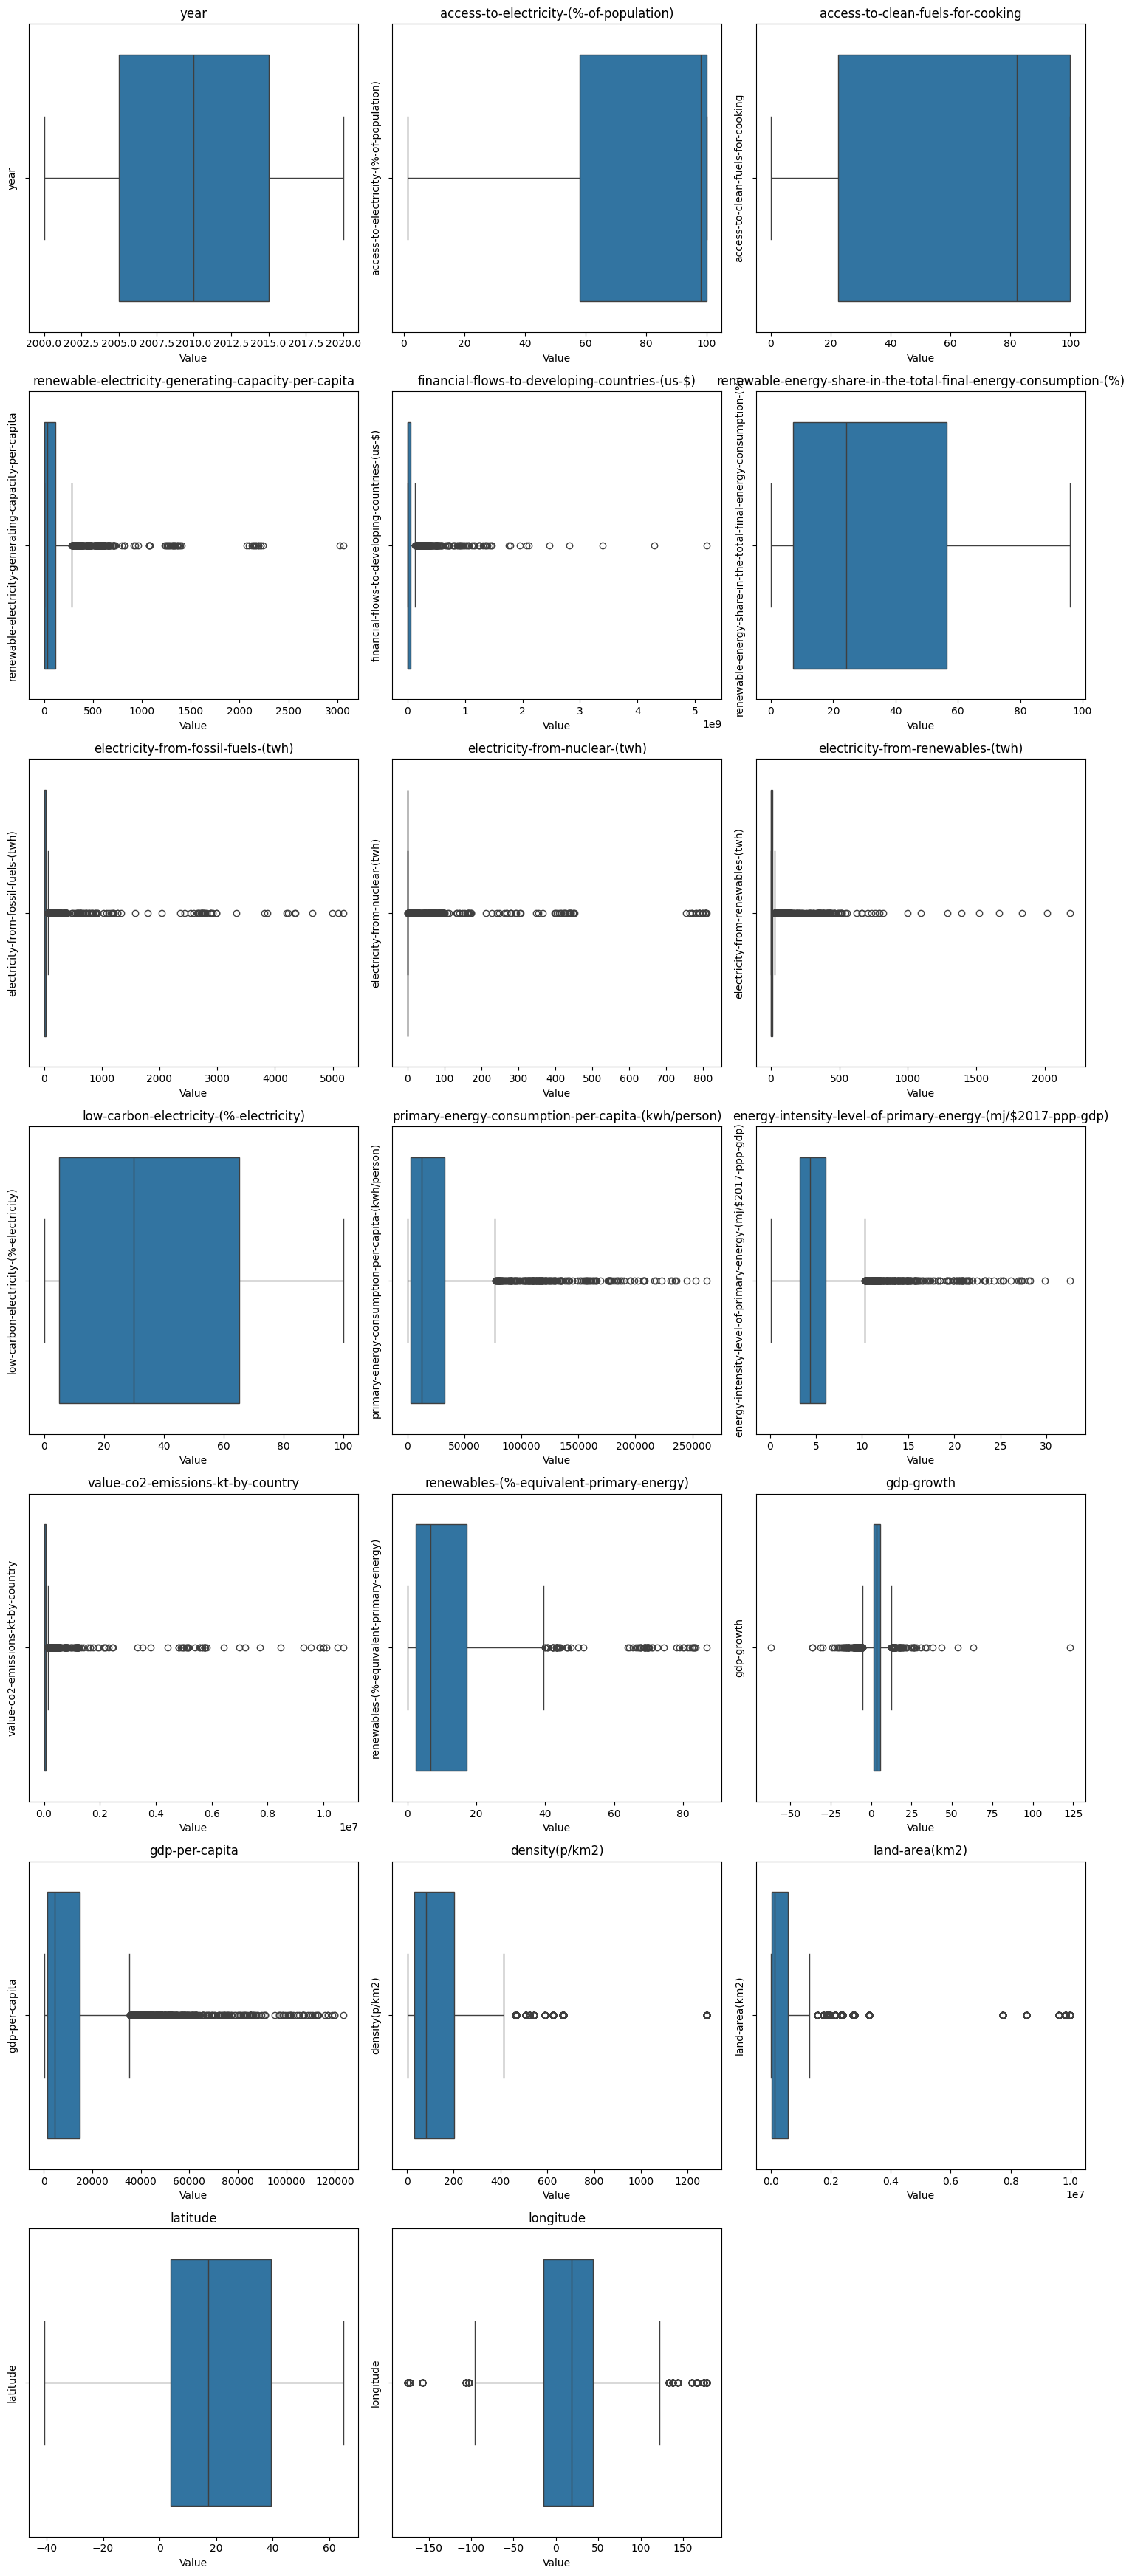

In [40]:
# Filter numerical columns
numerical_columns = df_eda.select_dtypes(include=['int', 'float']).columns

#Calculating the number of rows required for the subplots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

#Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5*num_rows))

#Create boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    ax = axes[i//num_cols, i%num_cols] if num_rows > 1 else axes[i%num_cols]
    sns.boxplot(x=df_eda[column], ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel('Value')
    ax.set_ylabel(column)

#Remove empty subplots
for i in range(len(numerical_columns), num_rows*num_cols):
  ax = axes[i//num_cols, i%num_cols] if num_rows > 1 else axes[i%num_cols]
  ax.remove()

plt.tight_layout()
plt.show()

In [41]:
#Function to calculate outliers using IQR
def calculate_outliers(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = (series < lower_bound) | (series > upper_bound)
  return outliers.sum()

#Filter numerical columns
numerical_columns = df_eda.select_dtypes(include=['int', 'float']).columns

#Calculate the number of outliers for each numerical column
outliers_count = {column: calculate_outliers(df_eda[column]) for column in numerical_columns}

#Create a DataFrame to store the columns result in descending format
outliers_df = pd.DataFrame(outliers_count.items(), columns=['Column', 'Outliers Count'])
outliers_df = outliers_df.sort_values(by='Outliers Count', ascending=False)

#Display the DataFrame
outliers_df

,Column,Outliers Count
7,electricity-from-nuclear-(twh),578
6,electricity-from-fossil-fuels-(twh),519
8,electricity-from-renewables-(twh),514
12,value-co2-emissions-kt-by-country,465
15,gdp-per-capita,430
17,land-area(km2),336
19,longitude,315
3,renewable-electricity-generating-capacity-per-capita,298
11,energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),275
4,financial-flows-to-developing-countries-(us-$),240


In [42]:
# List of Southeast Asian countries
sea_countries = [
    'Brunei', 'Burma', 'Myanmar', 'Cambodia', 'Timor-Leste', 'Indonesia',
    'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Filter the DataFrame based on Southeast Asian countries
sea_data = df_eda[df_eda['entity'].isin(sea_countries)]

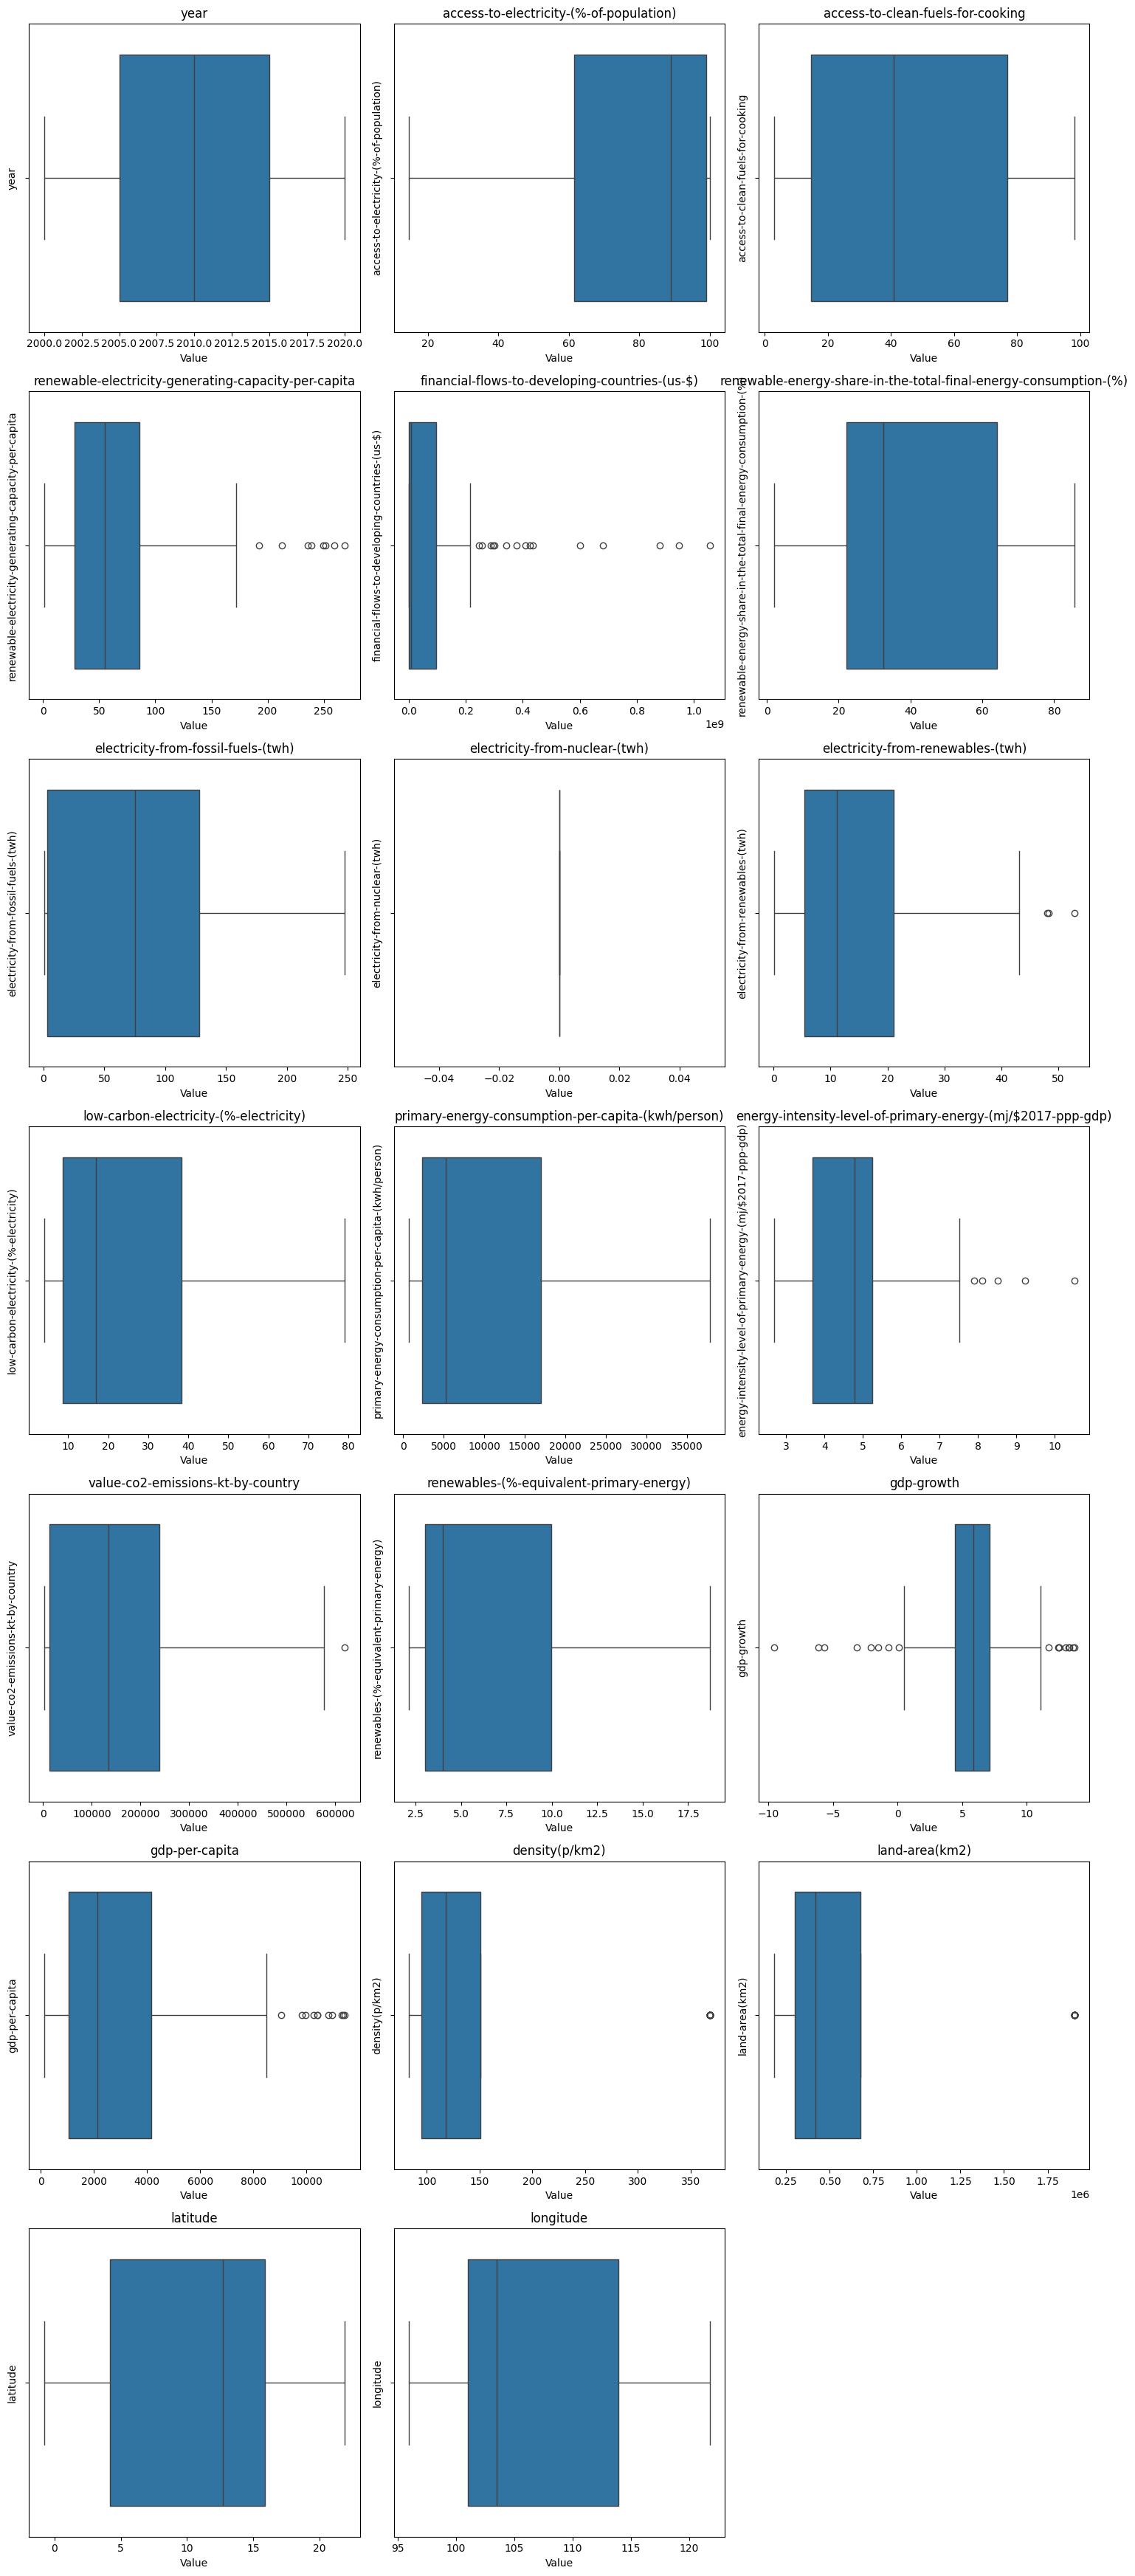

In [43]:
# Plotting boxplots for each numerical column
# Calculate the number of rows required for the subplots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    ax = axes[i//num_cols, i%num_cols] if num_rows > 1 else axes[i%num_cols]
    sns.boxplot(x=sea_data[column], ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel('Value')
    ax.set_ylabel(column)

# Remove empty subplots
for i in range(len(numerical_columns), num_rows*num_cols):
    ax = axes[i//num_cols, i%num_cols] if num_rows > 1 else axes[i%num_cols]
    ax.remove()

plt.tight_layout()
plt.show()

In [44]:
# Function to calculate outliers using IQR
def calculate_outliers_sea(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Filter numerical columns
numerical_columns_sea = sea_data.select_dtypes(include=['int', 'float']).columns

# Calculate the number of outliers for each numerical column
outliers_count_sea = {column: calculate_outliers_sea(sea_data[column]) for column in numerical_columns_sea}

# Create a DataFrame to store the columns result in descending format
outliers_df_sea = pd.DataFrame(outliers_count_sea.items(), columns=['Column', 'Outliers Count in SEA Data'])
outliers_df_sea = outliers_df_sea.sort_values(by='Outliers Count in SEA Data', ascending=False)

outliers_df_sea

,Column,Outliers Count in SEA Data
17,land-area(km2),21
16,density(p/km2),21
14,gdp-growth,17
4,financial-flows-to-developing-countries-(us-$),15
15,gdp-per-capita,11
3,renewable-electricity-generating-capacity-per-capita,8
11,energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),5
8,electricity-from-renewables-(twh),3
12,value-co2-emissions-kt-by-country,1
0,year,0


### **Data Preprocessing**

Before I split the raw data to train and test, since it is clear that we will only focus in South East Asia, I will select only countries in South East Asia from our data to be used in our modeling

In [45]:
sea_countries = [
    'Brunei', 'Burma', 'Myanmar', 'Cambodia', 'Timor-Leste', 'Indonesia',
    'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

df = df[df['entity'].isin(sea_countries)].reset_index(drop=True)

df.head()

,entity,year,access-to-electricity-(%-of-population),access-to-clean-fuels-for-cooking,renewable-electricity-generating-capacity-per-capita,financial-flows-to-developing-countries-(us-$),renewable-energy-share-in-the-total-final-energy-consumption-(%),electricity-from-fossil-fuels-(twh),electricity-from-nuclear-(twh),electricity-from-renewables-(twh),low-carbon-electricity-(%-electricity),primary-energy-consumption-per-capita-(kwh/person),energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),value-co2-emissions-kt-by-country,renewables-(%-equivalent-primary-energy),gdp-growth,gdp-per-capita,density(p/km2),land-area(km2),latitude,longitude
0,Cambodia,2000.0,16.600000,3.6,0.83,NaN,81.58,0.42,0.0,0.05,10.638298,739.45550,7.91,1960.000000,NaN,9.993580,300.613679,95.0,181035.0,12.565679,104.990963
1,Cambodia,2001.0,14.624778,4.1,0.82,NaN,80.51,0.48,0.0,0.03,5.882353,769.40970,7.51,2150.000000,NaN,8.148386,321.150224,95.0,181035.0,12.565679,104.990963
2,Cambodia,2002.0,18.187100,4.7,0.97,NaN,80.97,0.66,0.0,0.03,4.347826,754.14470,7.05,2210.000038,NaN,6.578940,338.987477,95.0,181035.0,12.565679,104.990963
3,Cambodia,2003.0,19.300000,5.3,0.96,4630000.0,79.92,0.67,0.0,0.04,5.633803,803.81635,6.69,2380.000114,NaN,8.505896,362.335482,95.0,181035.0,12.565679,104.990963
4,Cambodia,2004.0,25.298384,5.9,1.02,409150000.0,80.69,0.73,0.0,0.03,3.947368,813.56445,6.23,2380.000114,NaN,10.340529,408.513639,95.0,181035.0,12.565679,104.990963


#### **Split Data to X and Y**

Having our data already pre-selected countried only in South East Asia, we will proceed to split our data to X (Features) and y (target)

Here we will be having two things as our targets :
- electricity-from-fossil-fuels-(twh)
- electricity-from-renewables-(twh)

Both of these target will have the same X (features). However, we will try to predict both targets with different models later. 

In [106]:
#Defining the target column
target_fossil = ['electricity-from-fossil-fuels-(twh)']
target_renewables = ['electricity-from-renewables-(twh)']

# Dropping the target columns to create the feature set (X)
X = df.drop(columns=target_fossil + target_renewables)

# Extracting the target variables
y_fossil = df[target_fossil]
y_renewable = df[target_renewables]


In [109]:
#Splitting to train and test
X_train, X_test, y_train_fossil, y_test_fossil, y_train_renewables, y_test_renewables = train_test_split(X, y_fossil, y_renewable, test_size=0.2, random_state=22)

In [110]:
X_train.head()

,entity,year,access-to-electricity-(%-of-population),access-to-clean-fuels-for-cooking,renewable-electricity-generating-capacity-per-capita,financial-flows-to-developing-countries-(us-$),renewable-energy-share-in-the-total-final-energy-consumption-(%),electricity-from-nuclear-(twh),low-carbon-electricity-(%-electricity),primary-energy-consumption-per-capita-(kwh/person),energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),value-co2-emissions-kt-by-country,renewables-(%-equivalent-primary-energy),gdp-growth,gdp-per-capita,density(p/km2),land-area(km2),latitude,longitude
15,Cambodia,2015.0,64.910420,20.30,62.79,8150000.0,60.63,0.0,50.704227,2299.2490,4.58,8430.000305,NaN,6.965798,1162.904995,95.0,181035.0,12.565679,104.990963
67,Myanmar,2004.0,46.230118,4.10,9.38,70000.0,80.47,0.0,48.237476,1285.3595,7.52,10149.999620,NaN,13.695287,193.368766,83.0,676578.0,21.916221,95.955974
103,Philippines,2019.0,95.645080,46.50,62.55,2000000.0,26.73,0.0,21.474360,5104.3910,2.68,145419.998200,10.227248,6.118526,3485.340844,368.0,300000.0,12.879721,121.774017
83,Myanmar,2020.0,70.397194,31.25,63.36,NaN,NaN,0.0,48.005093,3183.1047,NaN,NaN,NaN,3.173774,1467.604281,83.0,676578.0,21.916221,95.955974
20,Cambodia,2020.0,86.400000,36.80,95.03,NaN,NaN,0.0,54.674557,3918.6375,NaN,NaN,NaN,-3.147589,1543.669258,95.0,181035.0,12.565679,104.990963


In [49]:
y_train_fossil

,electricity-from-fossil-fuels-(twh)
15,2.10
67,2.79
103,83.30
83,12.25
20,3.83
54,123.23
12,0.51
50,105.01
90,34.12
79,7.53


In [50]:
y_train_renewables

,electricity-from-renewables-(twh)
15,2.16
67,2.60
103,22.78
83,11.31
20,4.62
54,10.76
12,0.86
50,8.61
90,20.39
79,10.02


#### **Missing Value Handling**

To ensure the smoothness of model calculation, we need to handle our missing values. 

In order to avoid unintentional data leak, here we will identify our missing values pattern only from train set

In [51]:
column_names = X_train.columns.tolist()

In [52]:
X_train.isnull().sum()

entity                                                               0
year                                                                 0
access-to-electricity-(%-of-population)                              0
access-to-clean-fuels-for-cooking                                    0
renewable-electricity-generating-capacity-per-capita                 0
financial-flows-to-developing-countries-(us-$)                      17
renewable-energy-share-in-the-total-final-energy-consumption-(%)     5
electricity-from-nuclear-(twh)                                      33
low-carbon-electricity-(%-electricity)                               0
primary-energy-consumption-per-capita-(kwh/person)                   0
energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp)          5
value-co2-emissions-kt-by-country                                    5
renewables-(%-equivalent-primary-energy)                            35
gdp-growth                                                           0
gdp-pe

We see that out from 19 columns, 4 of them have null values. With the definition for each columns are :

- **Financial flows to developing countries (USD**): Aid and assistance from developed countries for clean energy projects.
- **Renewable energy share in total final energy consumption (%)**: Percentage of renewable energy in final energy consumption.
- **Electricity from nuclear (TWh)**: Electricity generated from nuclear power in terawatt-hours.
- **Renewables (% equivalent primary energy)** : Equivalent primary energy that is derived from renewable sources.

Taking note from the definition of each column, it is highly probable that when there is a `NaN` value in those columns, it is because there should be zero as the value

Thus, with the said assumption, we will do a simple imputation with `0` to all our `NaN` values. For simplicity purposes, we will use `SimpleImputer` library from `Scikit-Learn`

In [53]:
#Impute NaN values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_clean = imputer.fit_transform(X_train)
X_test_clean = imputer.transform(X_test) #Implementing only transform to test set


In [54]:
#Converting the data back to DataFrame
if isinstance(X_train_clean, np.ndarray):
    X_train_clean = pd.DataFrame(X_train_clean, columns=column_names)  # Convert it to DataFrame

In [55]:
X_train_clean.head()

,entity,year,access-to-electricity-(%-of-population),access-to-clean-fuels-for-cooking,renewable-electricity-generating-capacity-per-capita,financial-flows-to-developing-countries-(us-$),renewable-energy-share-in-the-total-final-energy-consumption-(%),electricity-from-nuclear-(twh),low-carbon-electricity-(%-electricity),primary-energy-consumption-per-capita-(kwh/person),energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),value-co2-emissions-kt-by-country,renewables-(%-equivalent-primary-energy),gdp-growth,gdp-per-capita,density(p/km2),land-area(km2),latitude,longitude
0,Cambodia,2015.0,64.91042,20.3,62.79,8150000.0,60.63,0.0,50.704227,2299.249,4.58,8430.000305,0,6.965798,1162.904995,95.0,181035.0,12.565679,104.990963
1,Myanmar,2004.0,46.230118,4.1,9.38,70000.0,80.47,0.0,48.237476,1285.3595,7.52,10149.99962,0,13.695287,193.368766,83.0,676578.0,21.916221,95.955974
2,Philippines,2019.0,95.64508,46.5,62.55,2000000.0,26.73,0.0,21.47436,5104.391,2.68,145419.9982,10.227248,6.118526,3485.340844,368.0,300000.0,12.879721,121.774017
3,Myanmar,2020.0,70.397194,31.25,63.36,0,0,0.0,48.005093,3183.1047,0,0,0,3.173774,1467.604281,83.0,676578.0,21.916221,95.955974
4,Cambodia,2020.0,86.4,36.8,95.03,0,0,0.0,54.674557,3918.6375,0,0,0,-3.147589,1543.669258,95.0,181035.0,12.565679,104.990963


In [56]:
#Also converting back the test set to DataFrame
if isinstance(X_test_clean, np.ndarray):
    X_test_clean = pd.DataFrame(X_test_clean, columns=column_names)  # Convert it to DataFrame

In [57]:
#Checking the structure of our data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 15 to 117
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   entity                                                            100 non-null    object 
 1   year                                                              100 non-null    float64
 2   access-to-electricity-(%-of-population)                           100 non-null    float64
 3   access-to-clean-fuels-for-cooking                                 100 non-null    float64
 4   renewable-electricity-generating-capacity-per-capita              100 non-null    float64
 5   financial-flows-to-developing-countries-(us-$)                    83 non-null     float64
 6   renewable-energy-share-in-the-total-final-energy-consumption-(%)  95 non-null     float64
 7   electricity-from-nuclear-(twh)         

In [58]:
# Define the columns to be converted to float64
float_columns = [col for col in X_train.columns if col not in ['entity', 'year']]

# Convert columns to float64
X_train_clean[float_columns] = X_train_clean[float_columns].astype(np.float64)
X_test_clean[float_columns] = X_test_clean[float_columns].astype(np.float64)

# Convert 'year' column to int64
X_train_clean['year'] = X_train_clean['year'].astype(np.int64)
X_test_clean['year'] = X_test_clean['year'].astype(np.int64)

In [59]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   entity                                                            100 non-null    object 
 1   year                                                              100 non-null    int64  
 2   access-to-electricity-(%-of-population)                           100 non-null    float64
 3   access-to-clean-fuels-for-cooking                                 100 non-null    float64
 4   renewable-electricity-generating-capacity-per-capita              100 non-null    float64
 5   financial-flows-to-developing-countries-(us-$)                    100 non-null    float64
 6   renewable-energy-share-in-the-total-final-energy-consumption-(%)  100 non-null    float64
 7   electricity-from-nuclear-(twh)      

### **Outlier Handling**

So I notice that from our basic exploration, one of our column `electricity-from-nuclear-(twh)` has all `0` for it values. Since it provides no information to our model, we will drop the column

In [60]:
X_train_clean['electricity-from-nuclear-(twh)']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
60    0.0
61    0.0
62    0.0
63    0.0
64    0.0
65    0.0
66    0.0
67    0.0
68    0.0
69    0.0
70    0.0
71    0.0
72    0.0
73    0.0
74    0.0
75    0.0
76    0.0
77    0.0
78    0.0
79    0.0
80    0.0
81    0.0
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
87    0.0
88    0.0
89    0.0
90    0.0
91    0.0
92    0.0
93    0.0
94    0.0
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0


Since the electricity-from-nuclear-(twh) column has 0 as all of it values, we will drop it from our data

In [61]:
#Dropping from both train and test set
if 'electricity-from-nuclear-(twh)' in X_train_clean.columns:
    X_train_clean.drop(columns=['electricity-from-nuclear-(twh)'], inplace=True)

if 'electricity-from-nuclear-(twh)' in X_test_clean.columns:
    X_test_clean.drop(columns=['electricity-from-nuclear-(twh)'], inplace=True)

Before we handle the outliers in our data, it is wise to check the distribution in each column. Since the method to handle skewed columns and normal distributed column might differ

In [62]:
# Filter Numerical Columns in X train
numeric_columns = X_train_clean.select_dtypes(include=np.number).columns.to_list()

# Skewed columns container
skewed_numeric_data = []
skewed_numeric_columns = []

# Normal distribution columns container
normal_numeric_data = []
normal_numeric_columns = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for column in numeric_columns:
    skewness = X_train_clean[column].skew()
    # If Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        normal_numeric_columns.append(column)
        normal_numeric_data.append([column, skewness])
    # If Skewed distribution
    elif skewness < -0.5 or skewness > 0.5:
        skewed_numeric_columns.append(column)
        skewed_numeric_data.append([column, skewness])

The code above identifies the skewness of each numeric column in X_train. If the skewness of the data is between -0.5 and 0.5, it is considered normally distributed. If the skewness is greater than 0.5 or less than -0.5, the data is considered skewed.

In [63]:
numeric_columns

['year',
 'access-to-electricity-(%-of-population)',
 'access-to-clean-fuels-for-cooking',
 'renewable-electricity-generating-capacity-per-capita',
 'financial-flows-to-developing-countries-(us-$)',
 'renewable-energy-share-in-the-total-final-energy-consumption-(%)',
 'low-carbon-electricity-(%-electricity)',
 'primary-energy-consumption-per-capita-(kwh/person)',
 'energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp)',
 'value-co2-emissions-kt-by-country',
 'renewables-(%-equivalent-primary-energy)',
 'gdp-growth',
 'gdp-per-capita',
 'density(p/km2)',
 'land-area(km2)',
 'latitude',
 'longitude']

In [64]:
# Showing all columns with normal distribution and each skewness
print('Columns with Normal Distribution')
pd.DataFrame(data=normal_numeric_data, columns=['normal_distributed_columns', 'skewness'])

Columns with Normal Distribution


,normal_distributed_columns,skewness
0,year,-0.028776
1,access-to-clean-fuels-for-cooking,0.279734
2,renewable-energy-share-in-the-total-final-energy-consumption-(%),0.323086
3,energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp),0.034751
4,latitude,-0.257414


We have 5 columns that have a normal distribution. The outliers in these five columns will be handles using the Gaussian Method with the Winsorizer module.

In [65]:
# Showing all columns with skewed distribution and each skewness
print('Columns with Skewed Distribution')
pd.DataFrame(data=skewed_numeric_data, columns=['skewed_columns', 'skewness'])

Columns with Skewed Distribution


,skewed_columns,skewness
0,access-to-electricity-(%-of-population),-1.150396
1,renewable-electricity-generating-capacity-per-capita,1.694771
2,financial-flows-to-developing-countries-(us-$),3.678152
3,low-carbon-electricity-(%-electricity),0.951645
4,primary-energy-consumption-per-capita-(kwh/person),1.208256
5,value-co2-emissions-kt-by-country,1.050677
6,renewables-(%-equivalent-primary-energy),1.455048
7,gdp-growth,-0.994103
8,gdp-per-capita,1.368022
9,density(p/km2),1.646155


The remaining 12 columns has skewed distribution. The outliers in these columns will be handled using the IQR method with the Winsorizer module.

In [66]:
# Capping Method for Normal Distribution  
winsorizer_normal_distribution = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_distribution.fit_transform(X_train_clean)

# Transforming X_test
X_test_capped = winsorizer_normal_distribution.transform(X_test_clean)

Using the code above, outliers are capped with the Gaussian method for columns that are normally distributed. Subsequently, the IQR method will be used to cap outliers in the skewed columns.

In [67]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=skewed_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

The code above caps outliers using the IQR method for columns with skewed distributions.



In [68]:
def outlier_handling_plot_comparison(df_before, df_after, variable):
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Create colormap for gradient
    cmap_before = plt.get_cmap("Blues")
    cmap_after = plt.get_cmap("Oranges")

    # Plot Histogram Before with gradient
    n, bins, patches = axes[0, 0].hist(df_before[variable], bins=30, color=cmap_before(0.5), edgecolor='black')
    for i in range(len(patches)):
        patches[i].set_facecolor(cmap_before(i / len(patches)))
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before with gradient color
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color=cmap_before(0.5))
    for i, artist in enumerate(axes[1, 0].artists):
        artist.set_facecolor(cmap_before(i / len(axes[1, 0].artists)))
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After with gradient
    n, bins, patches = axes[0, 1].hist(df_after[variable], bins=30, color=cmap_after(0.5), edgecolor='black')
    for i in range(len(patches)):
        patches[i].set_facecolor(cmap_after(i / len(patches)))
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After with gradient color
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color=cmap_after(0.5))
    for i, artist in enumerate(axes[1, 1].artists):
        artist.set_facecolor(cmap_after(i / len(axes[1, 1].artists)))
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

The function above visualizes the data before and after capping outliers using the selected method. It displays both the histogram and the box plot for each numerical feature.

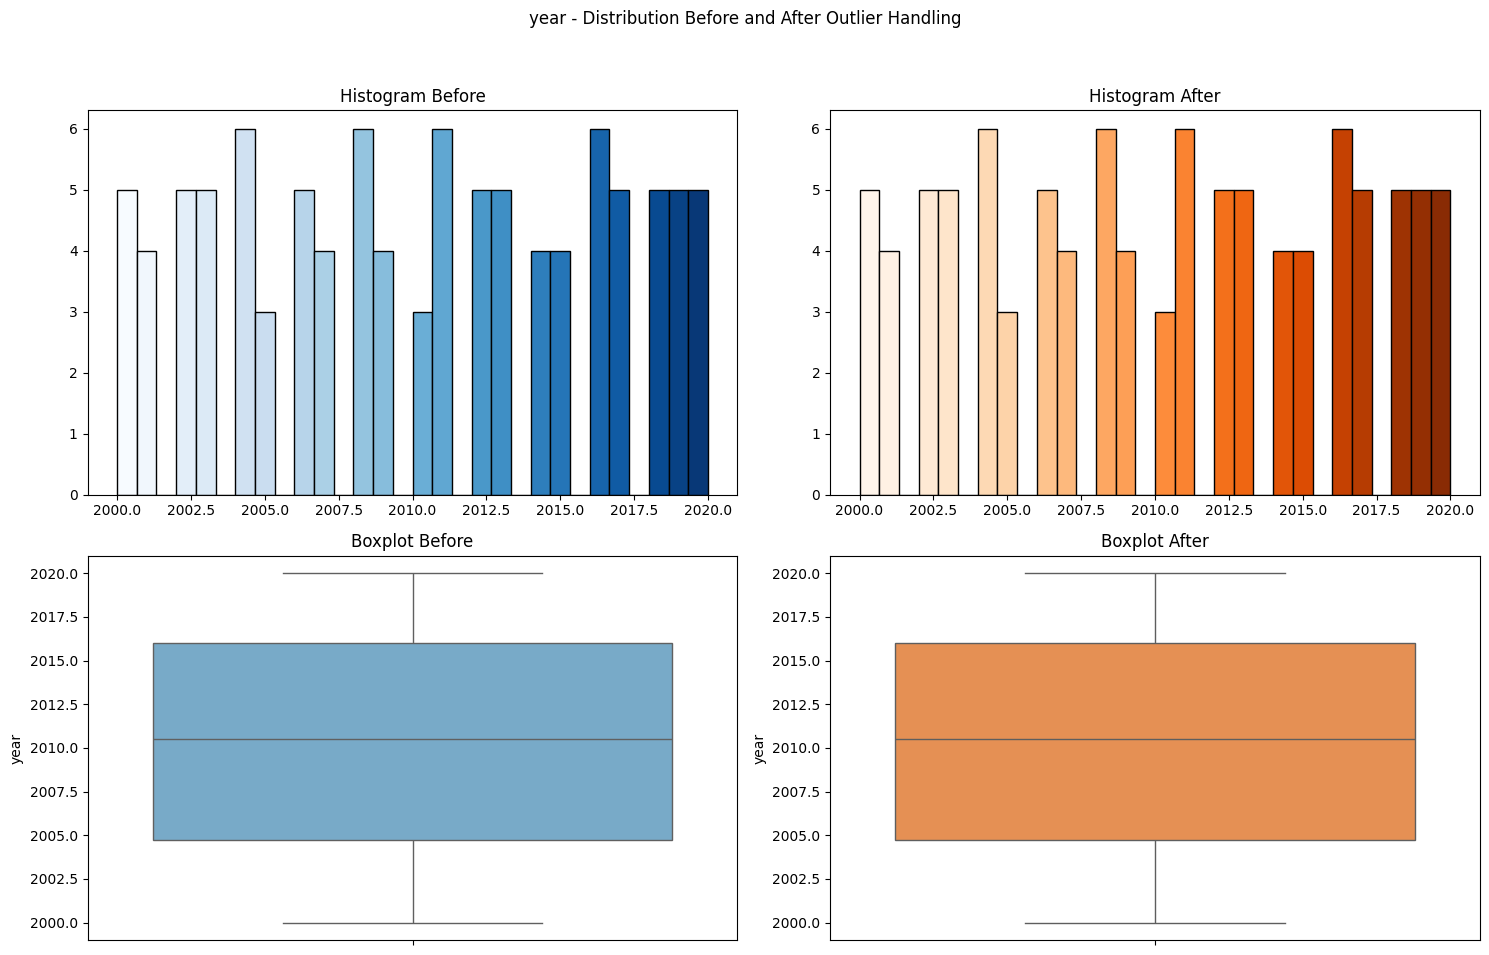

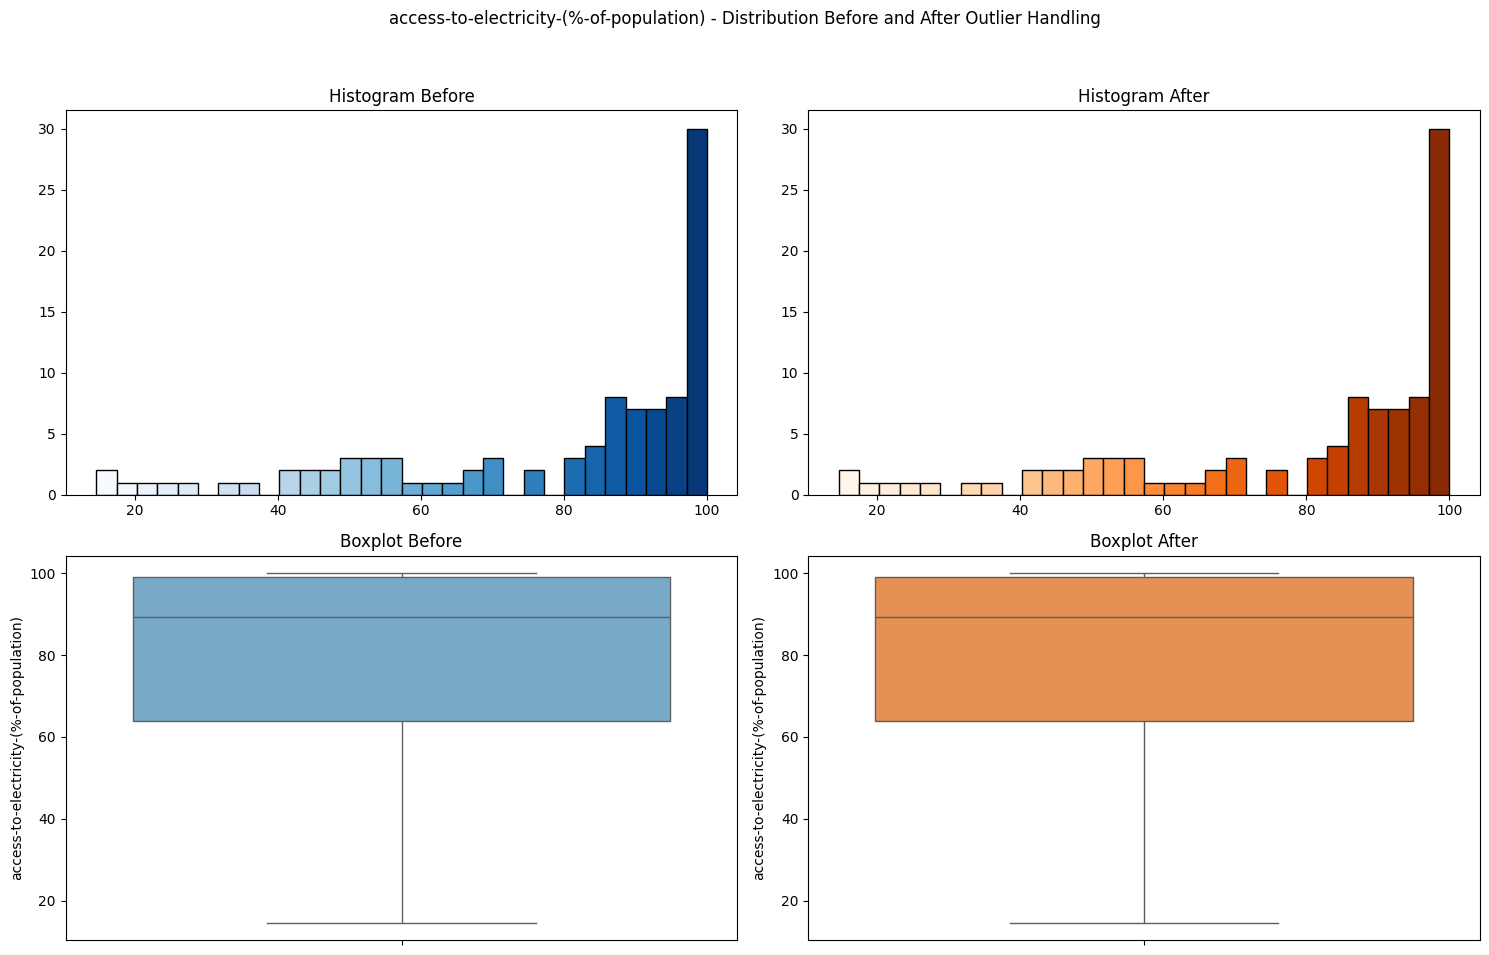

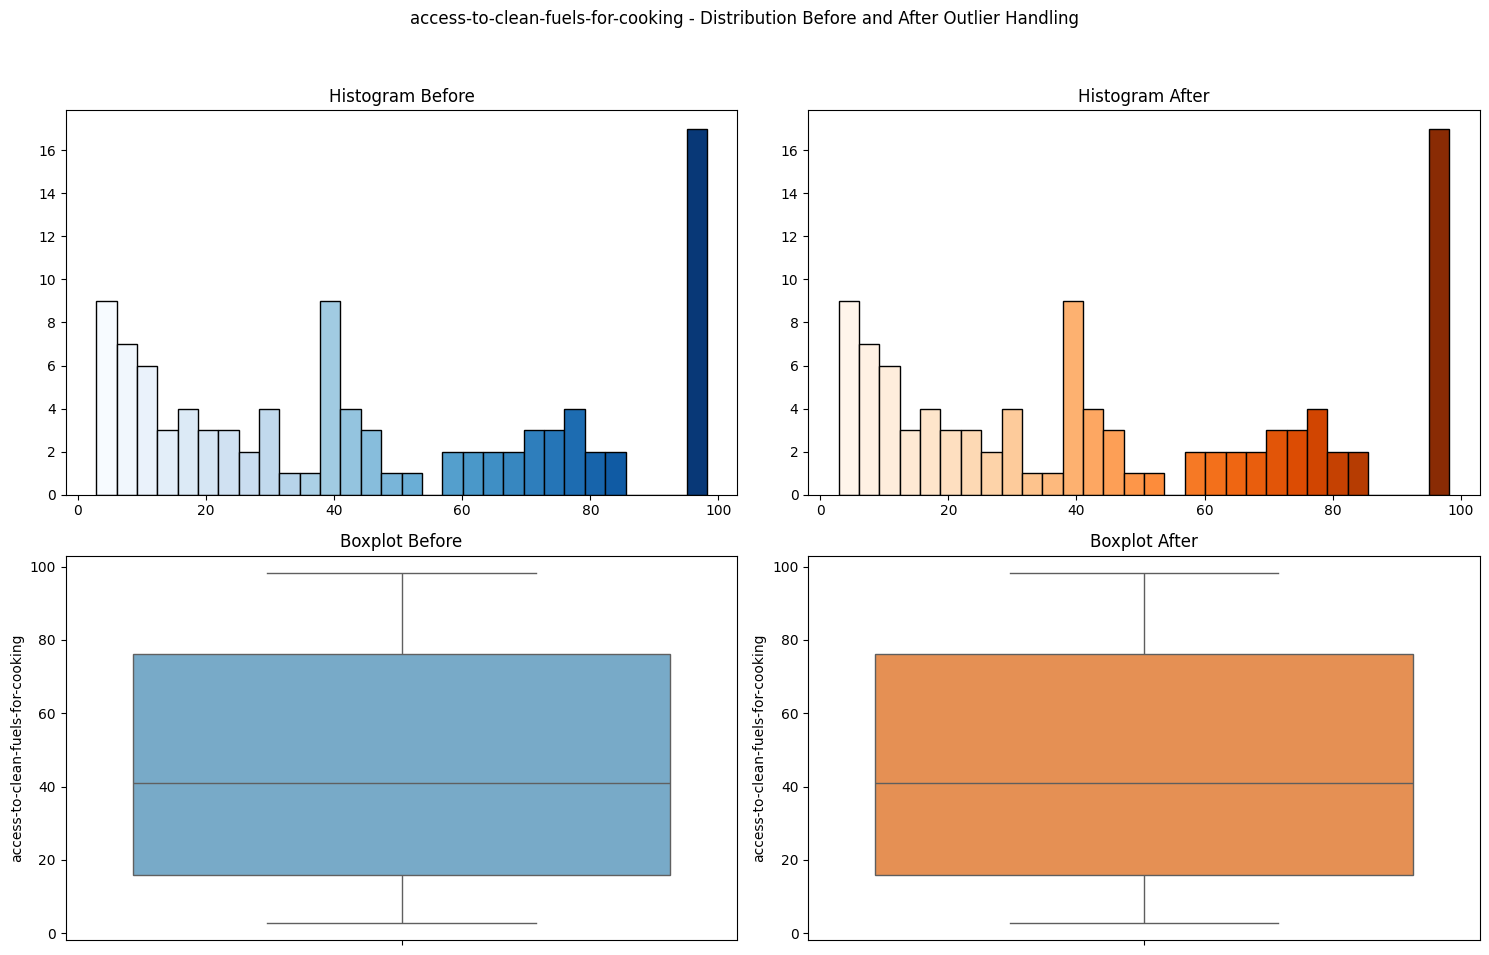

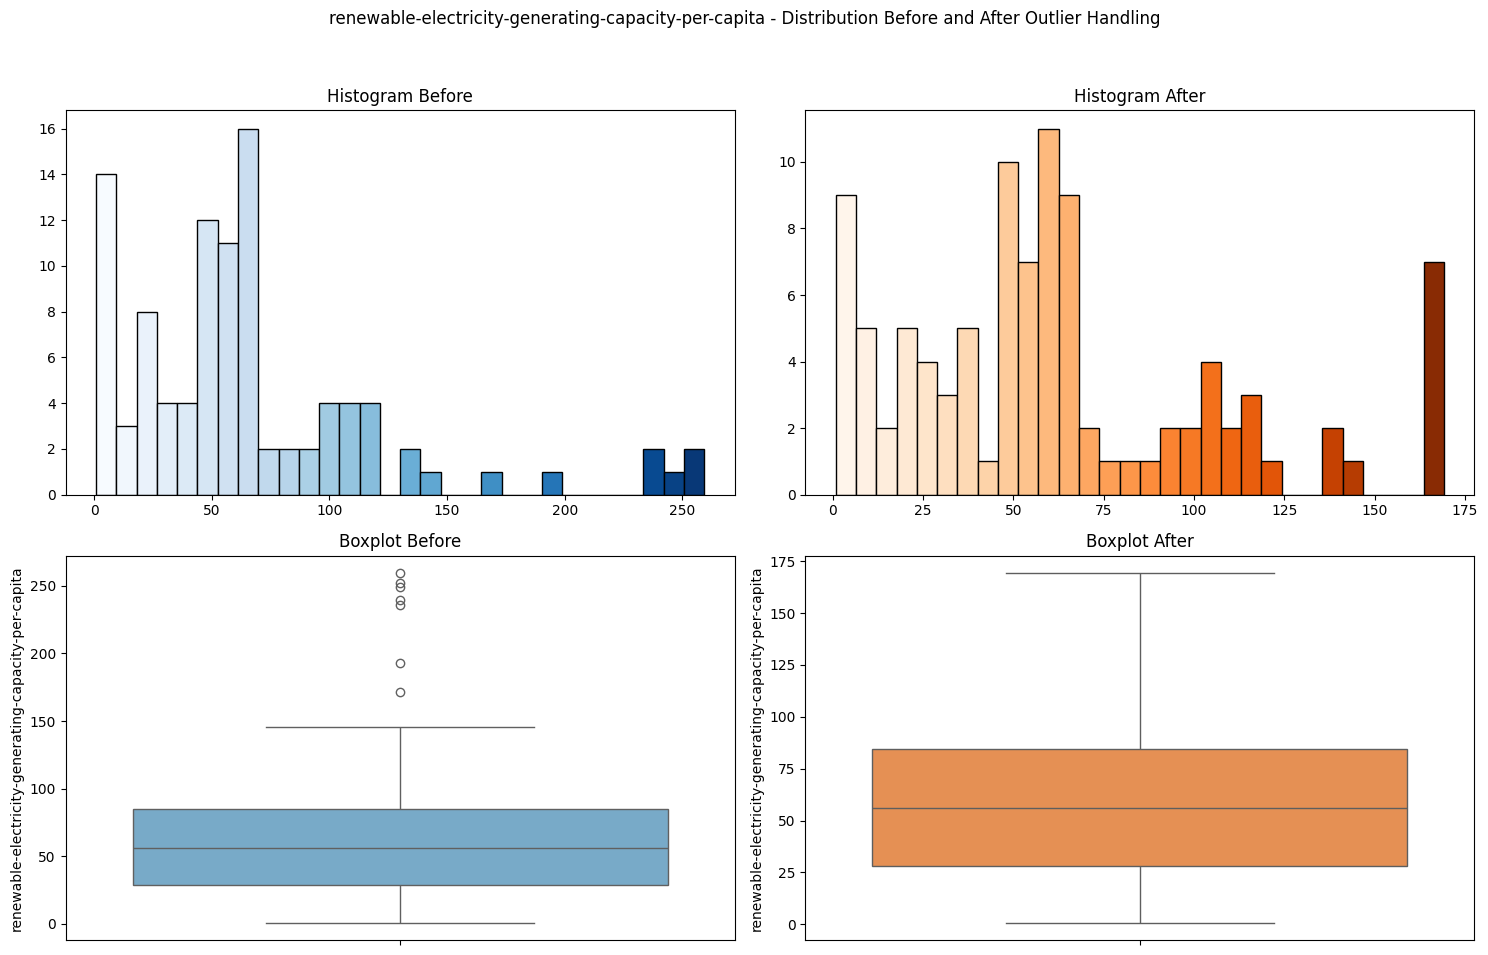

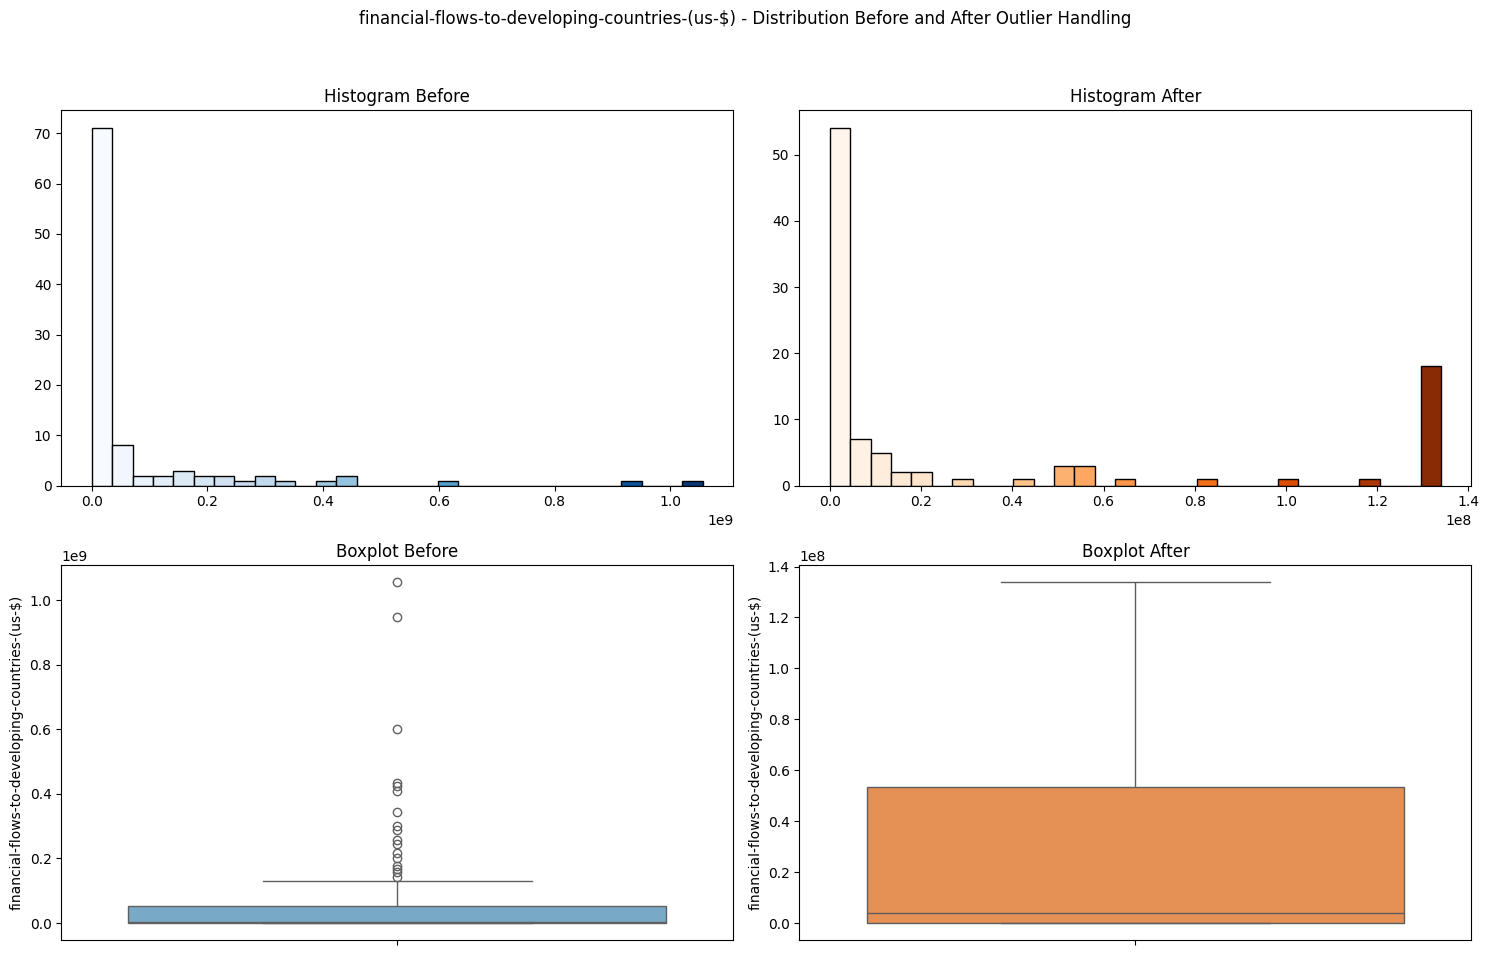

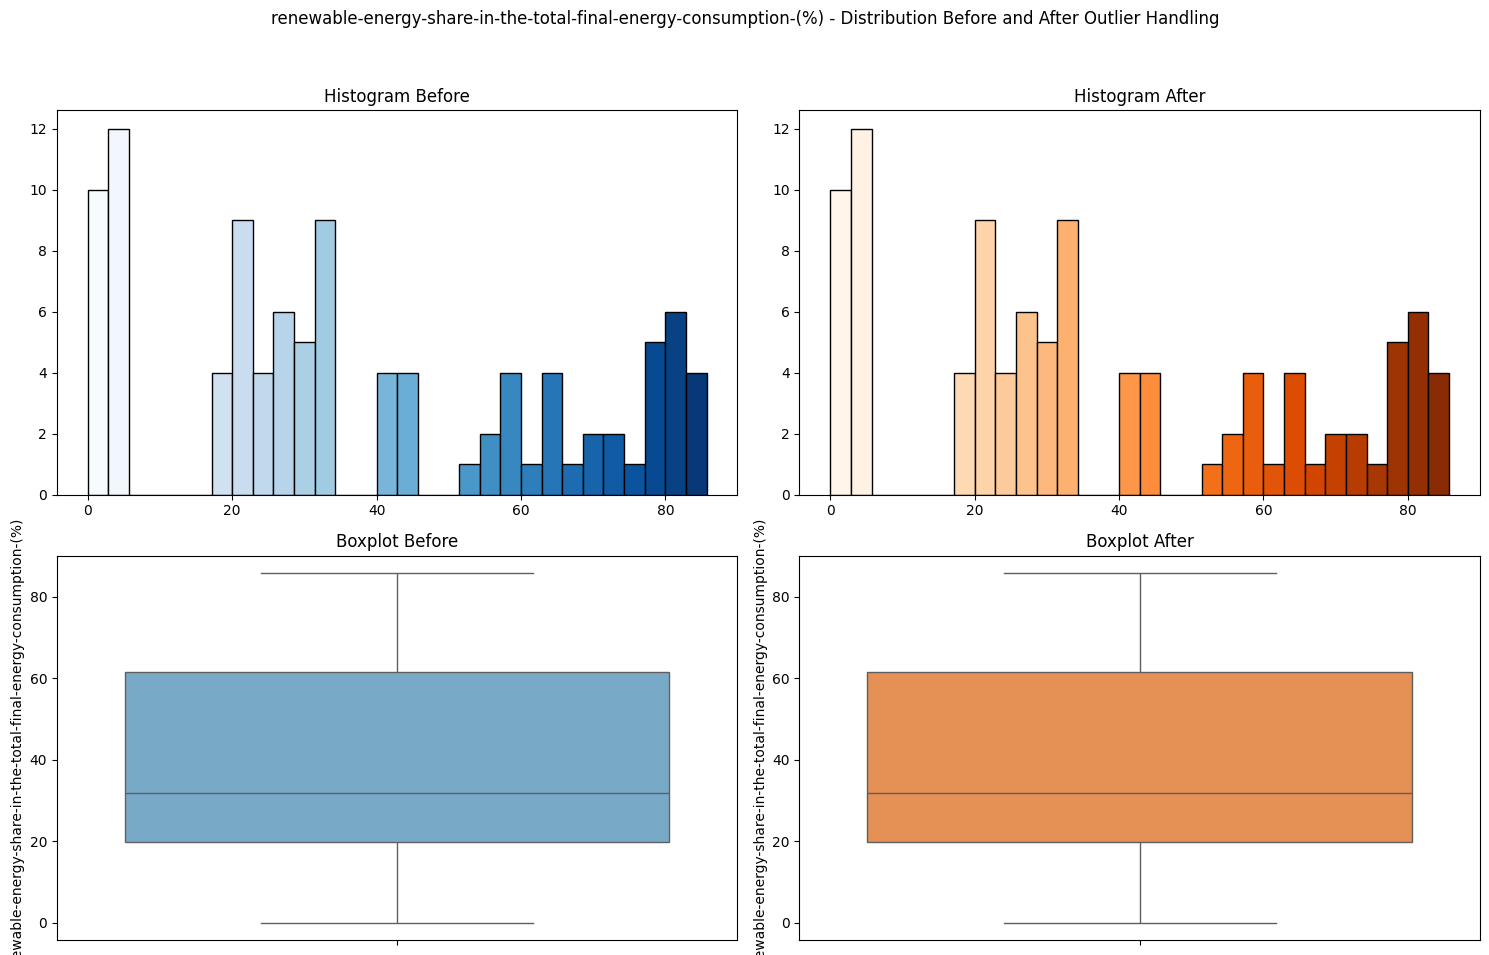

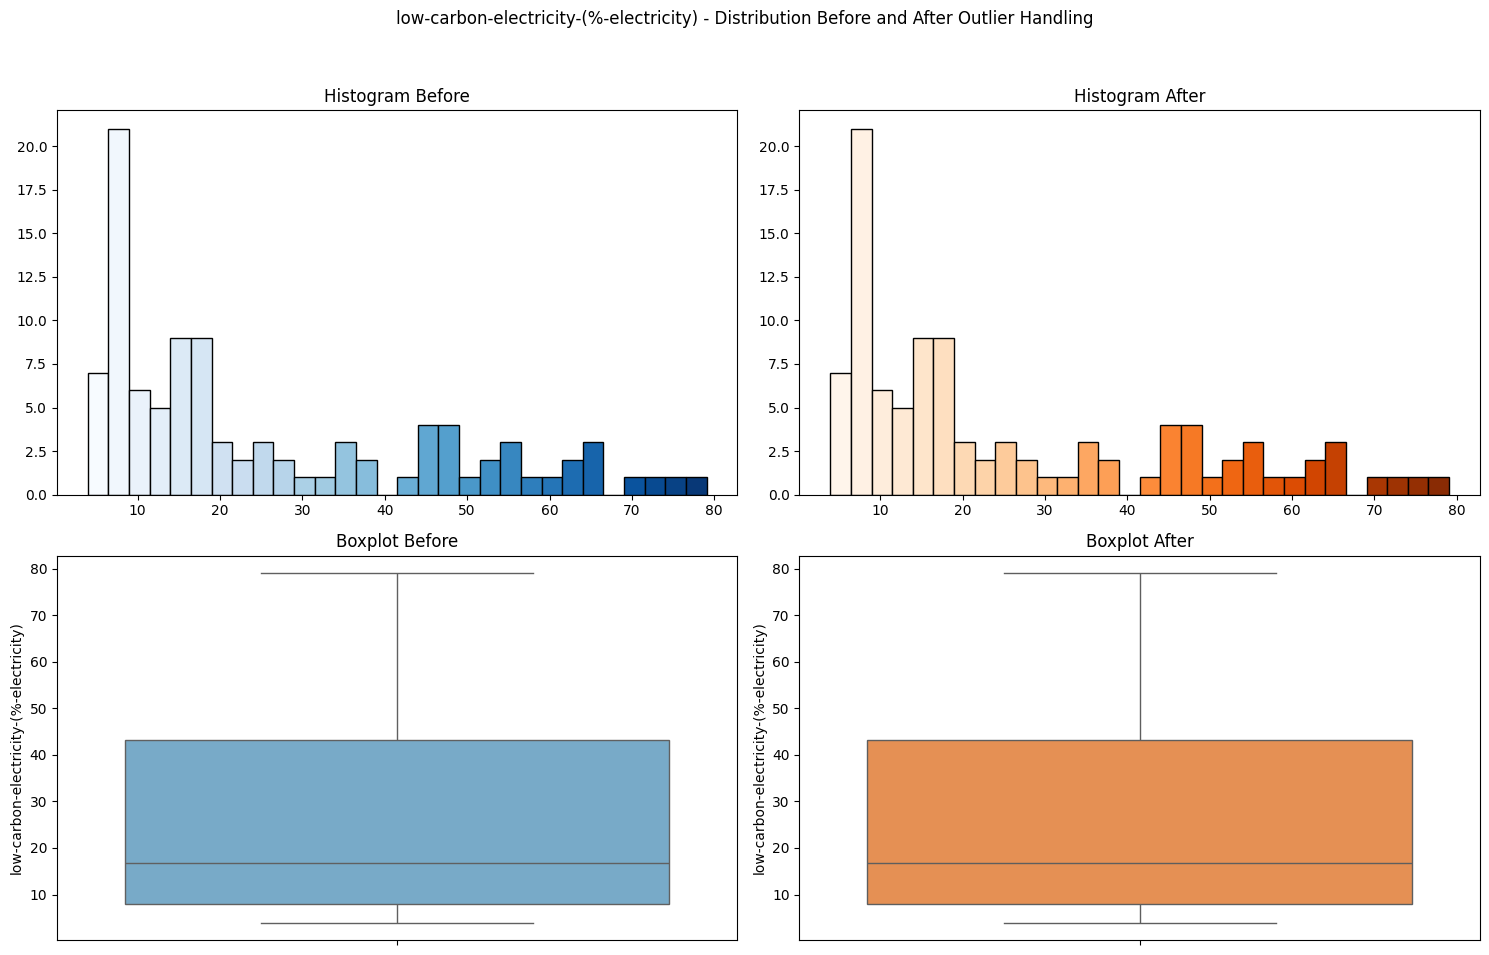

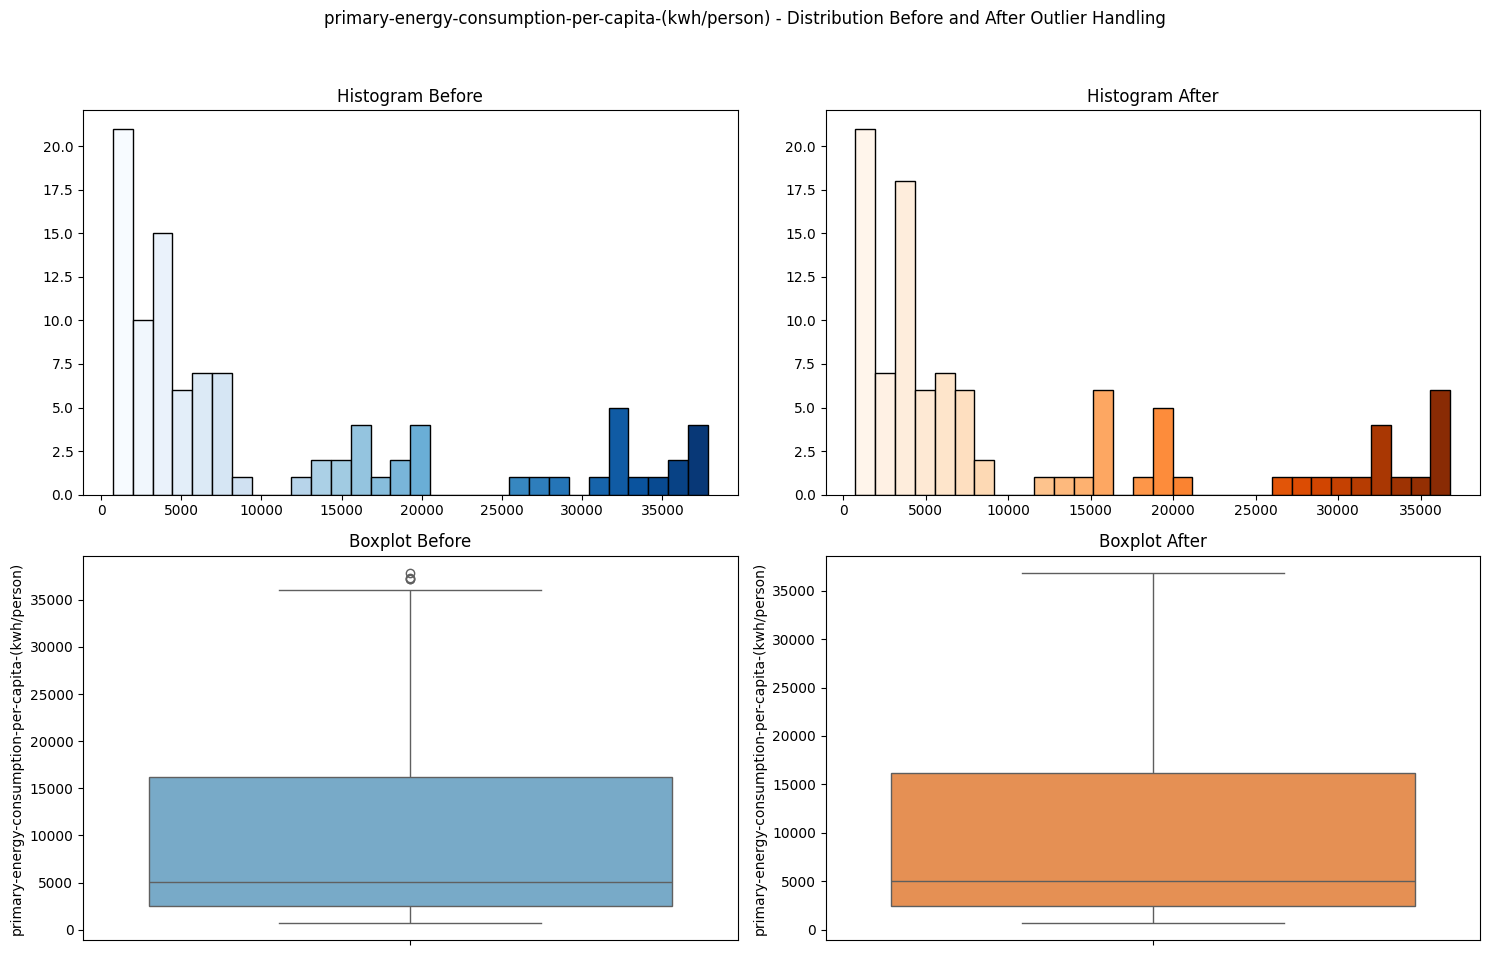

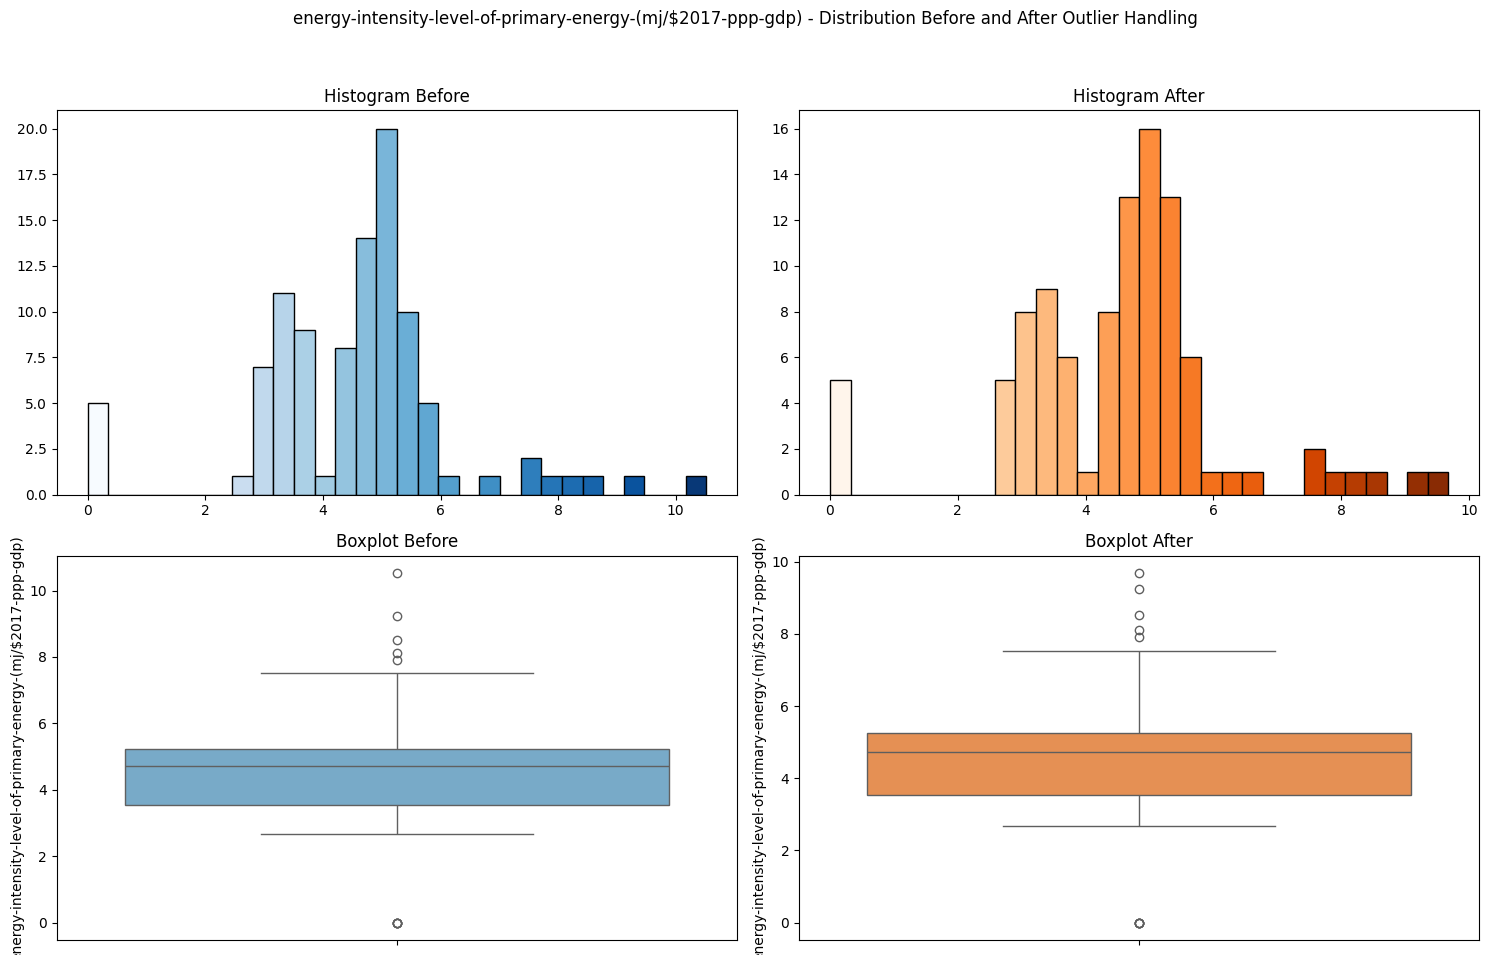

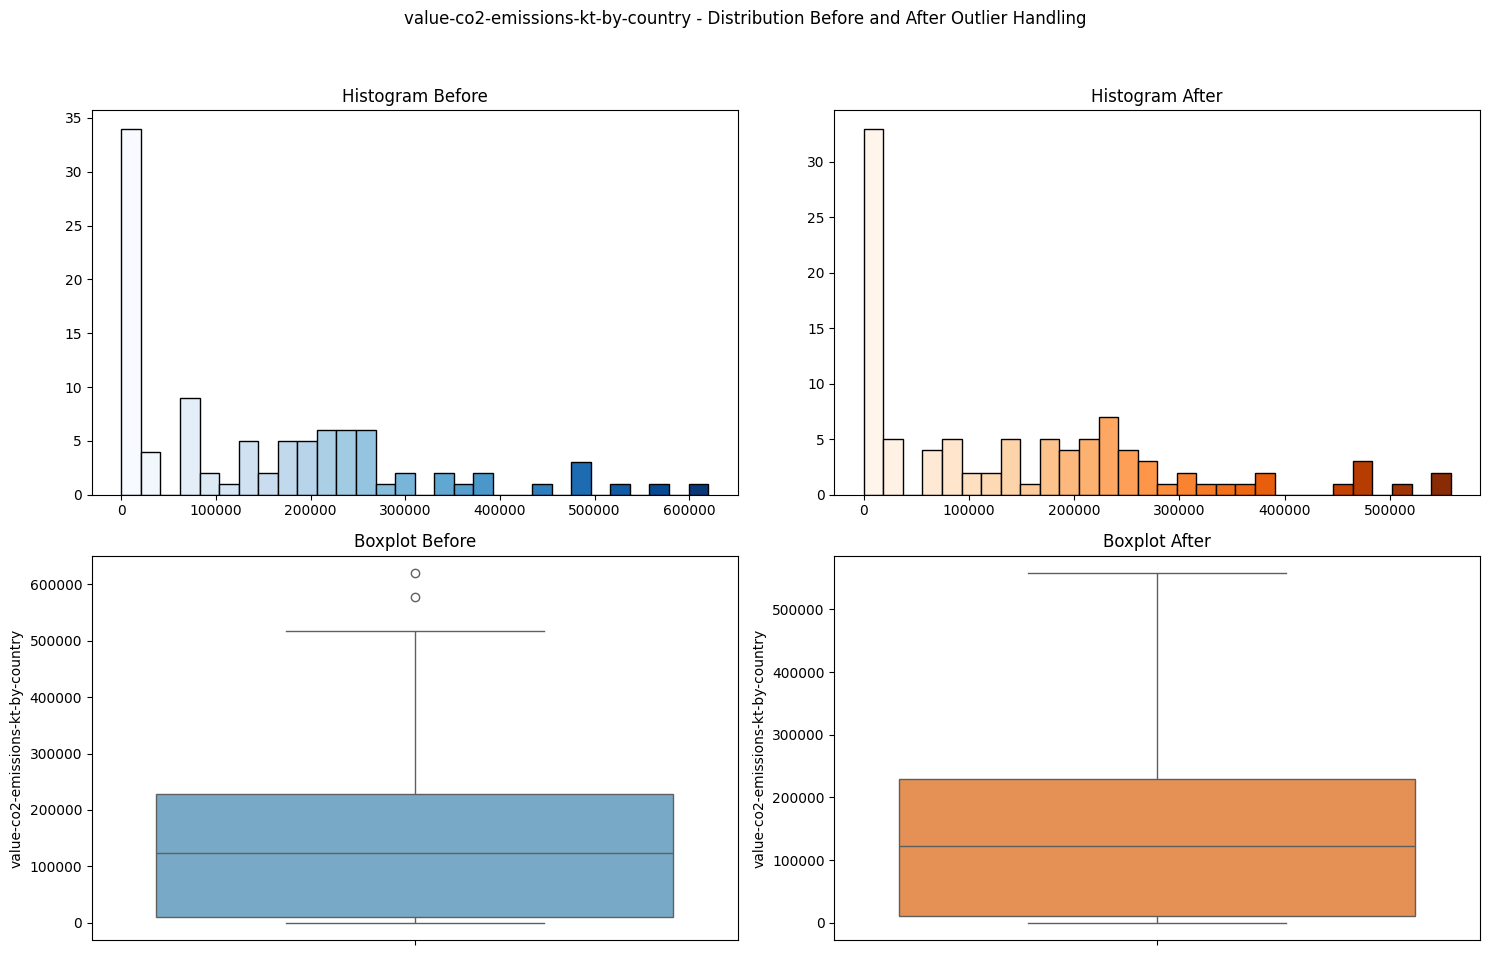

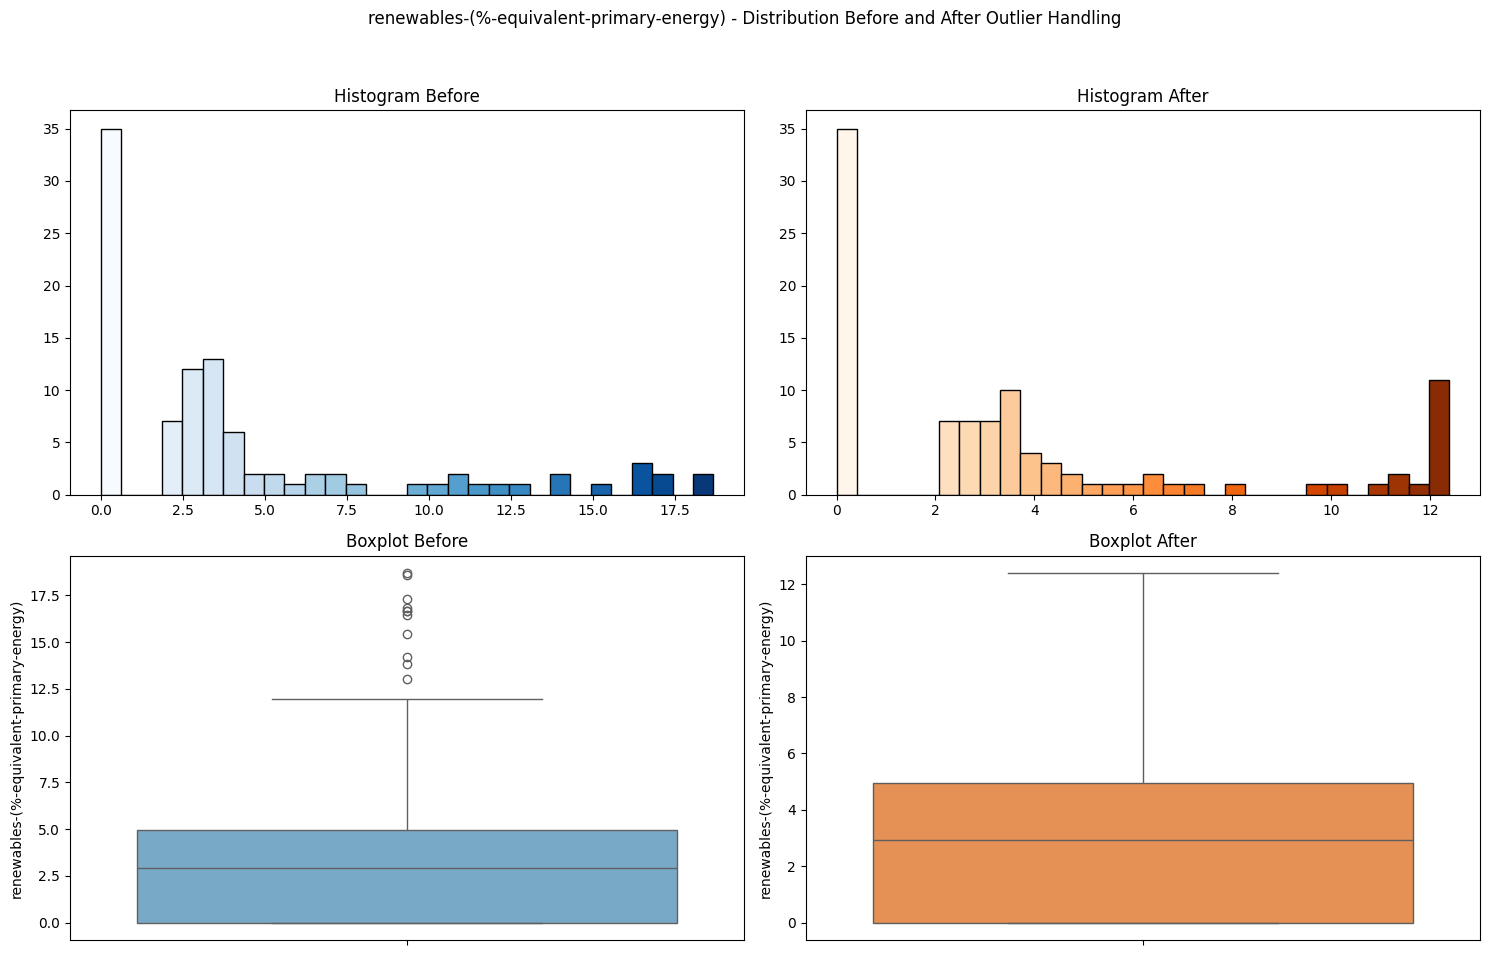

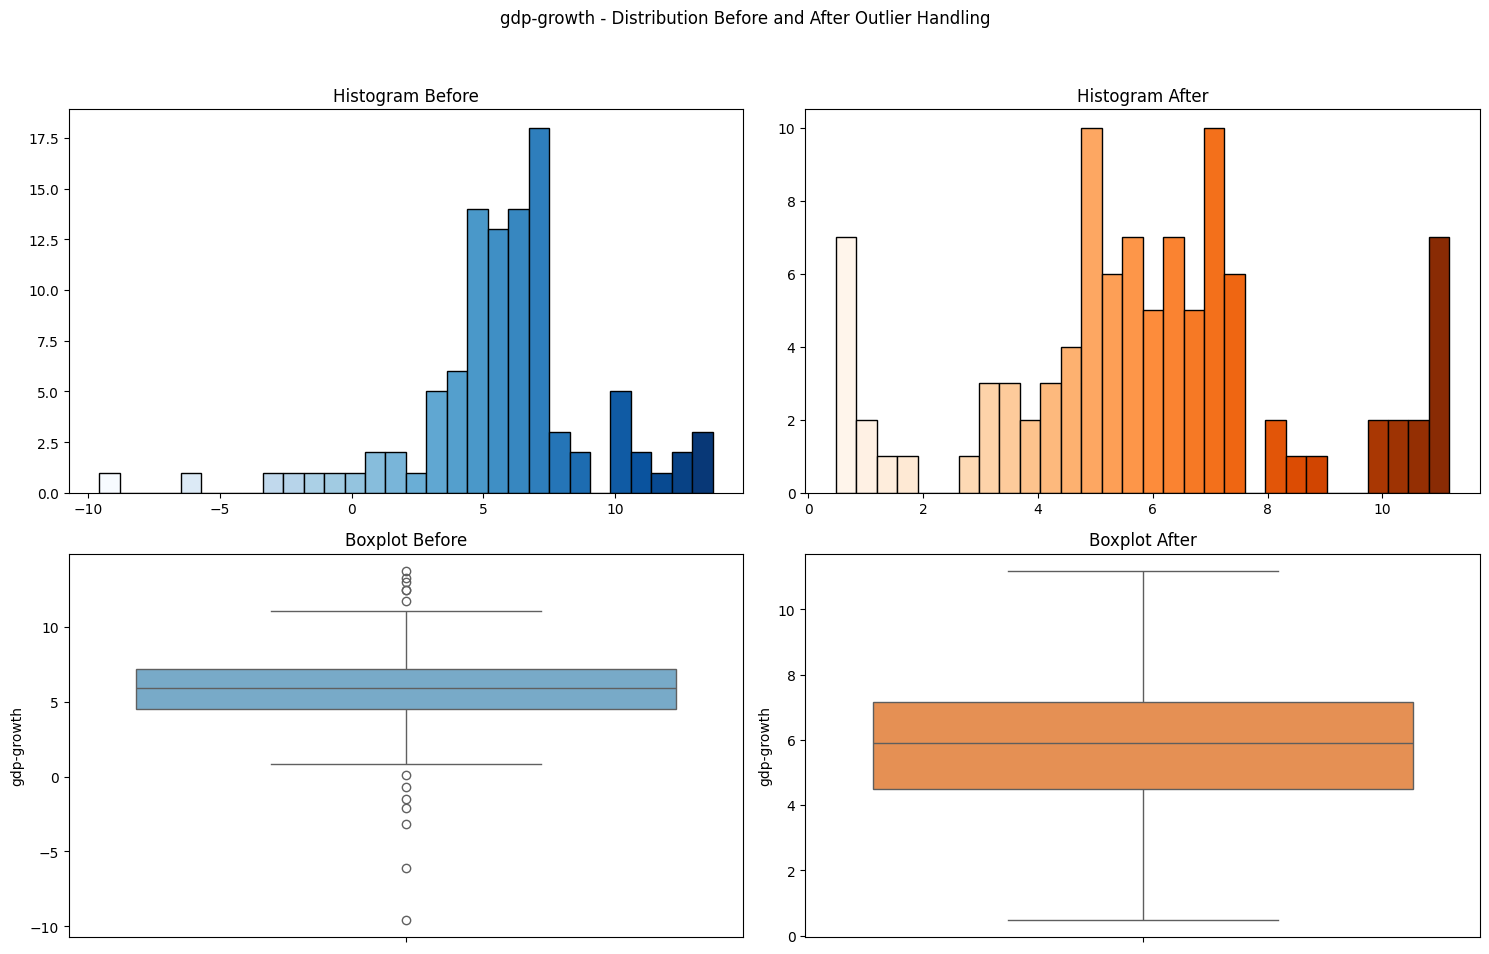

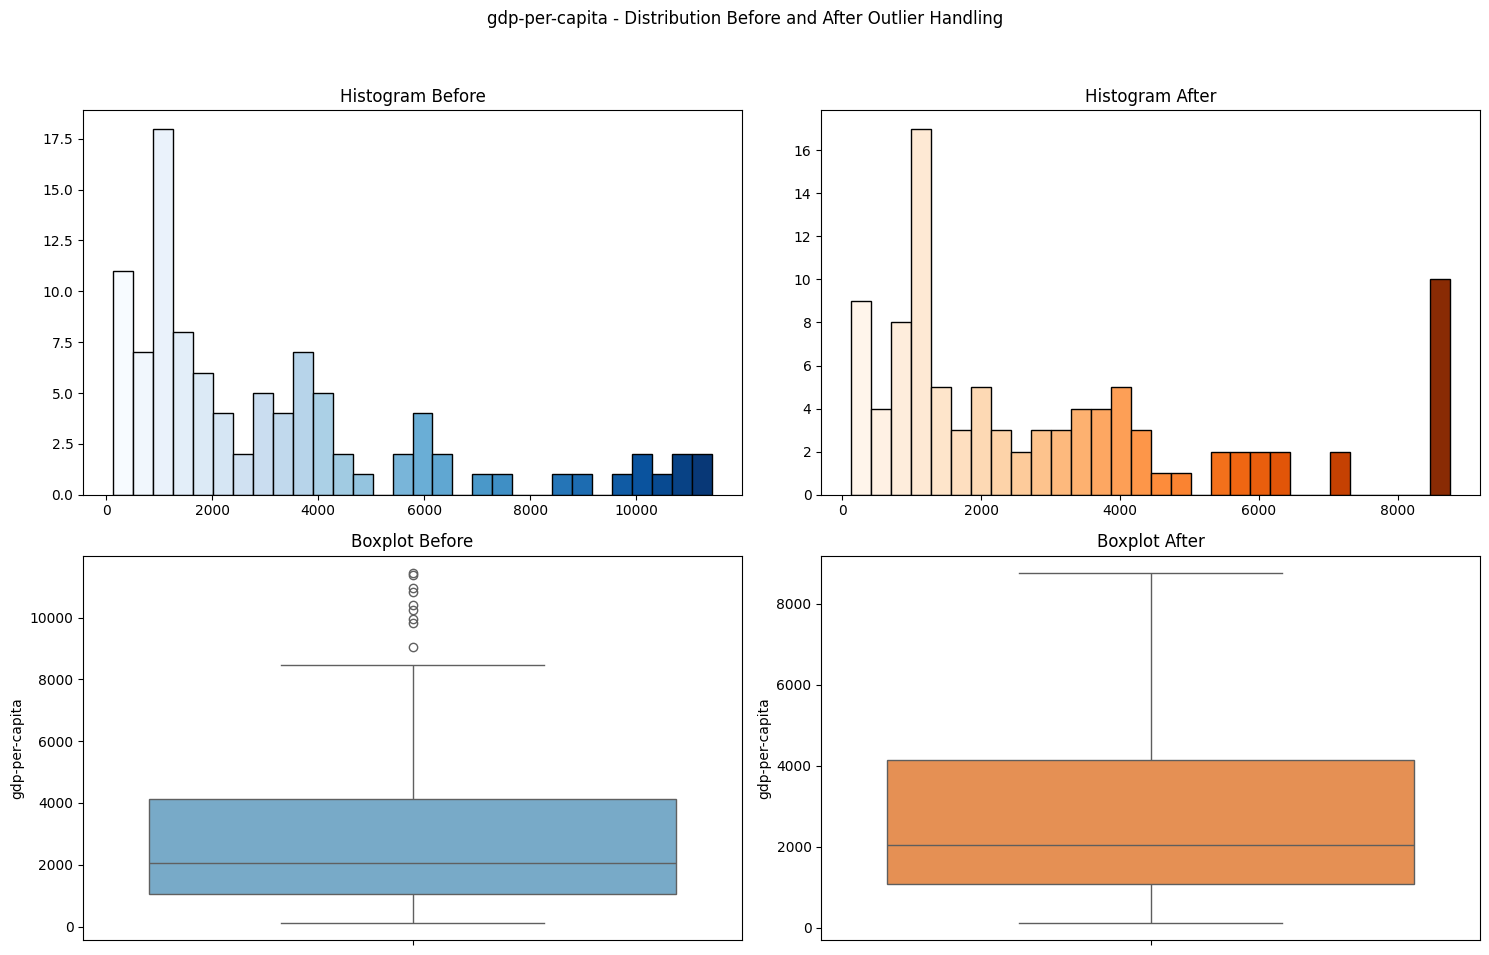

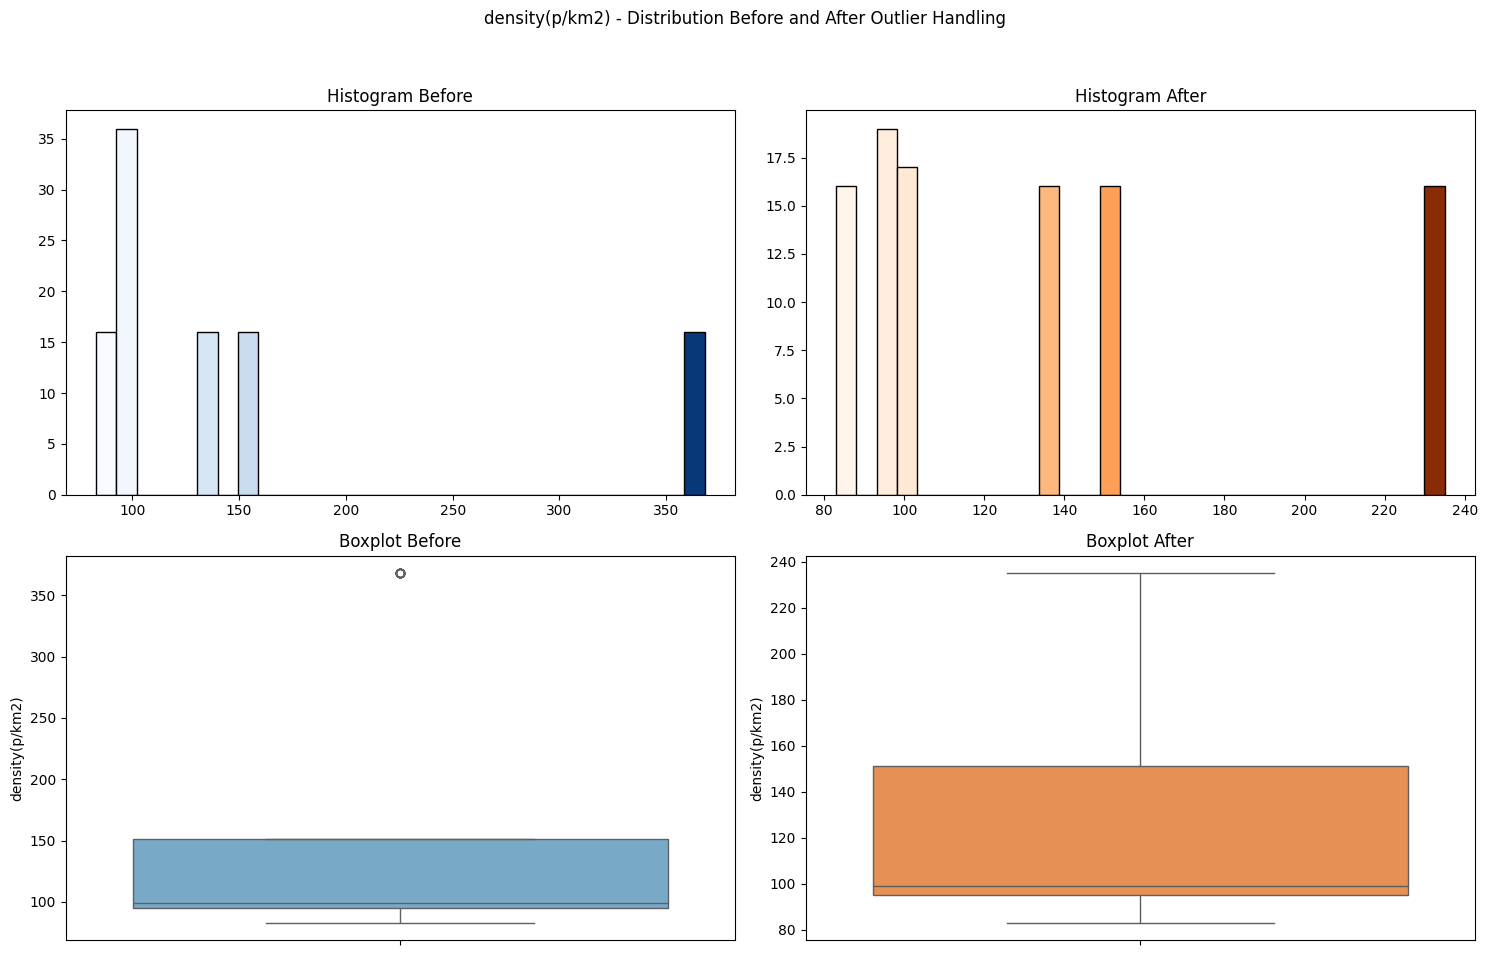

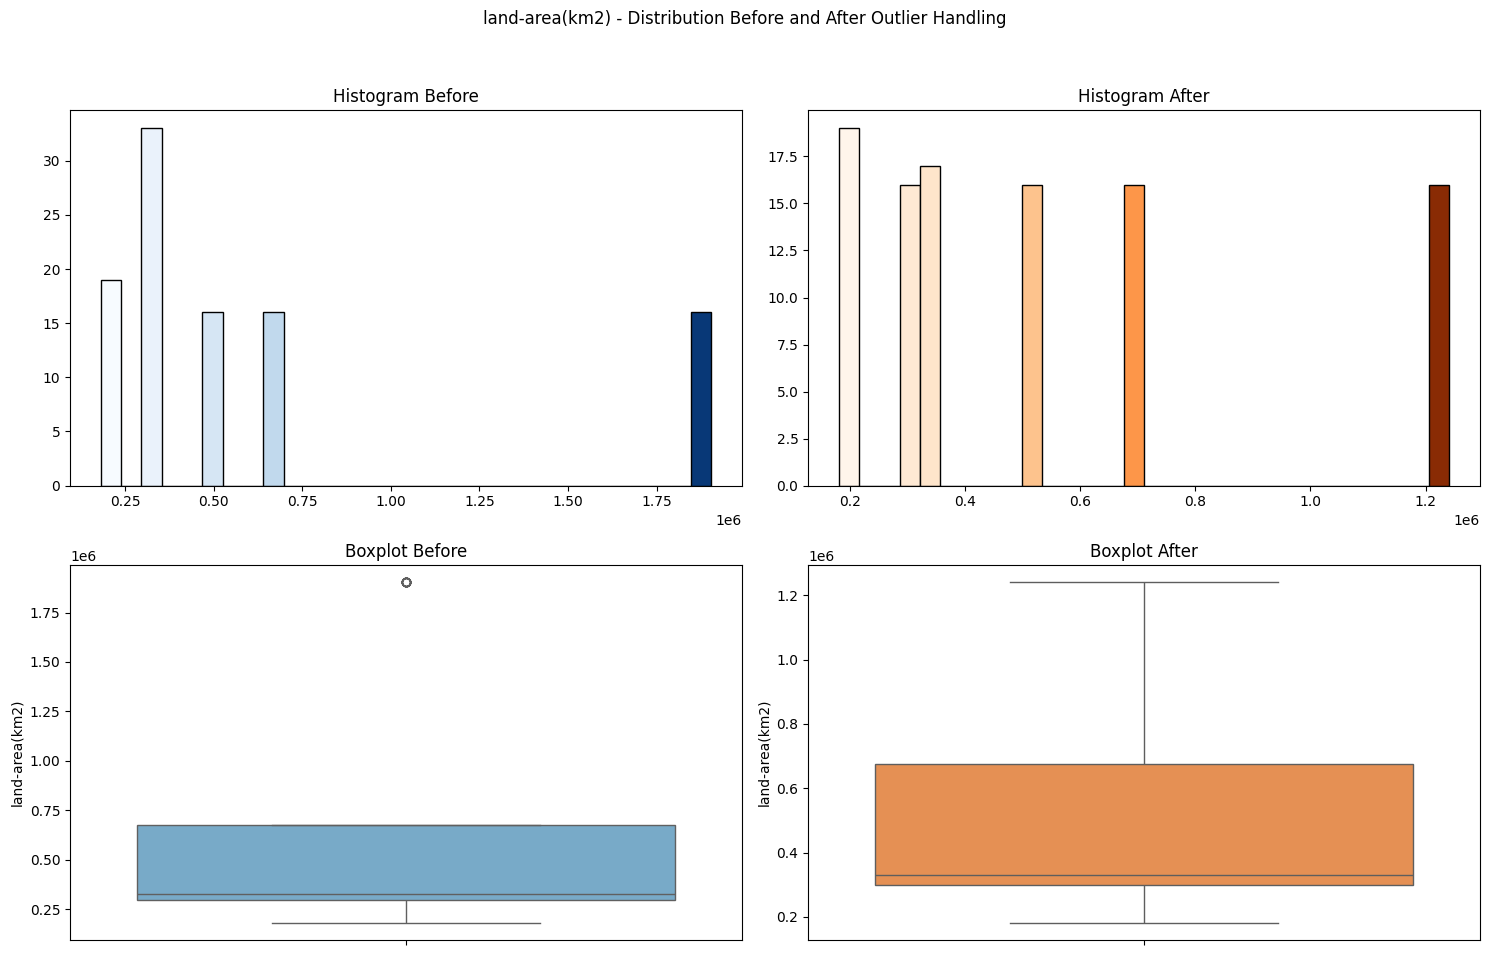

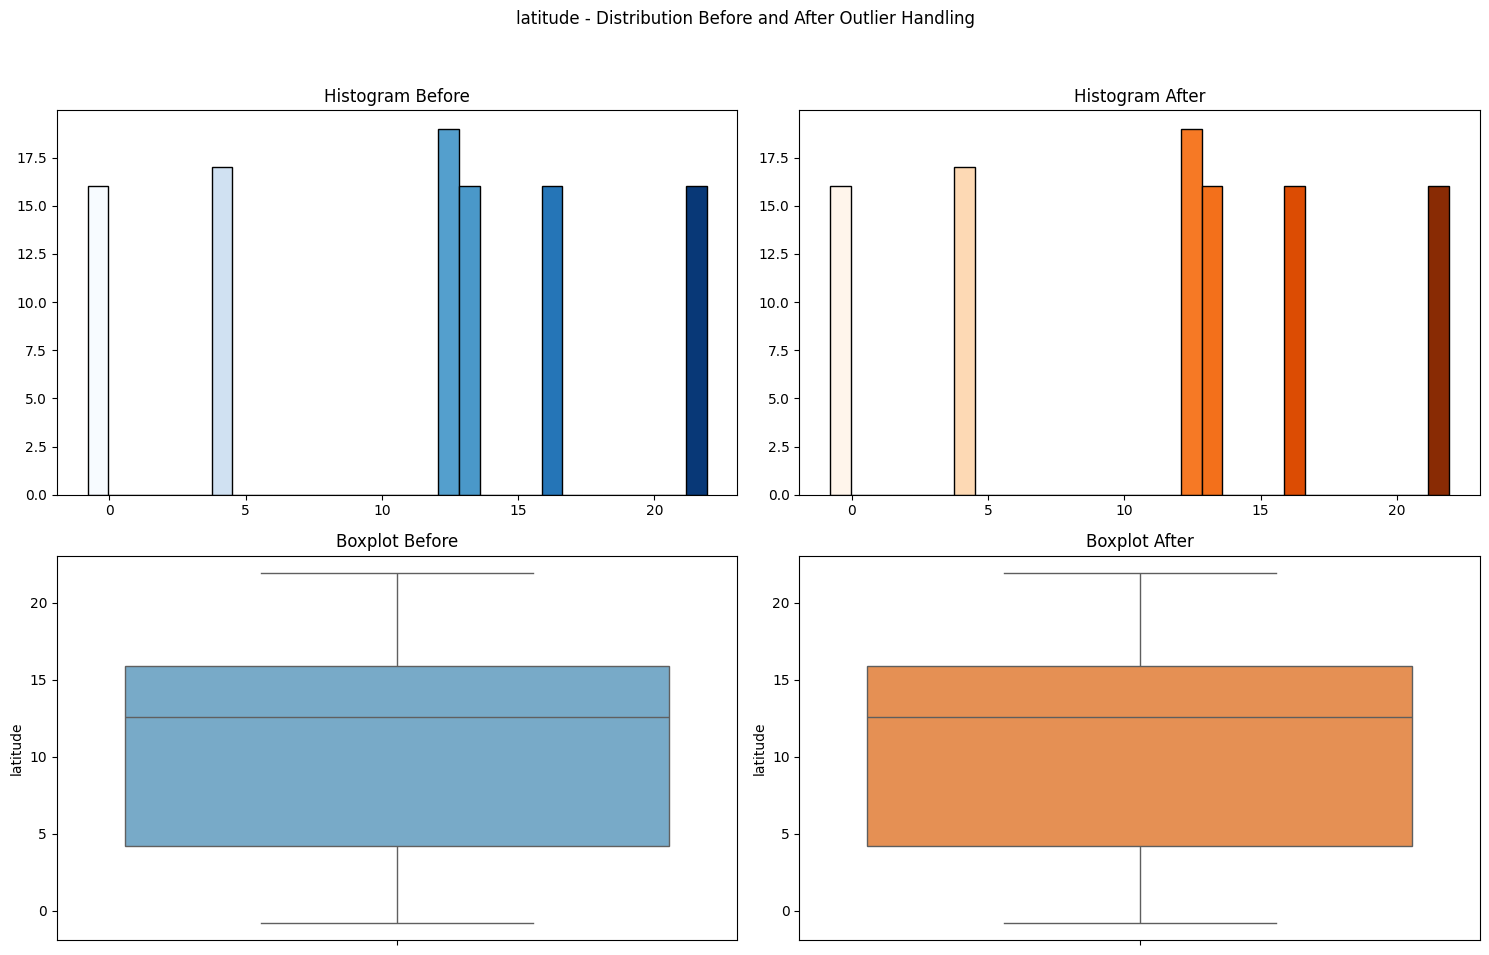

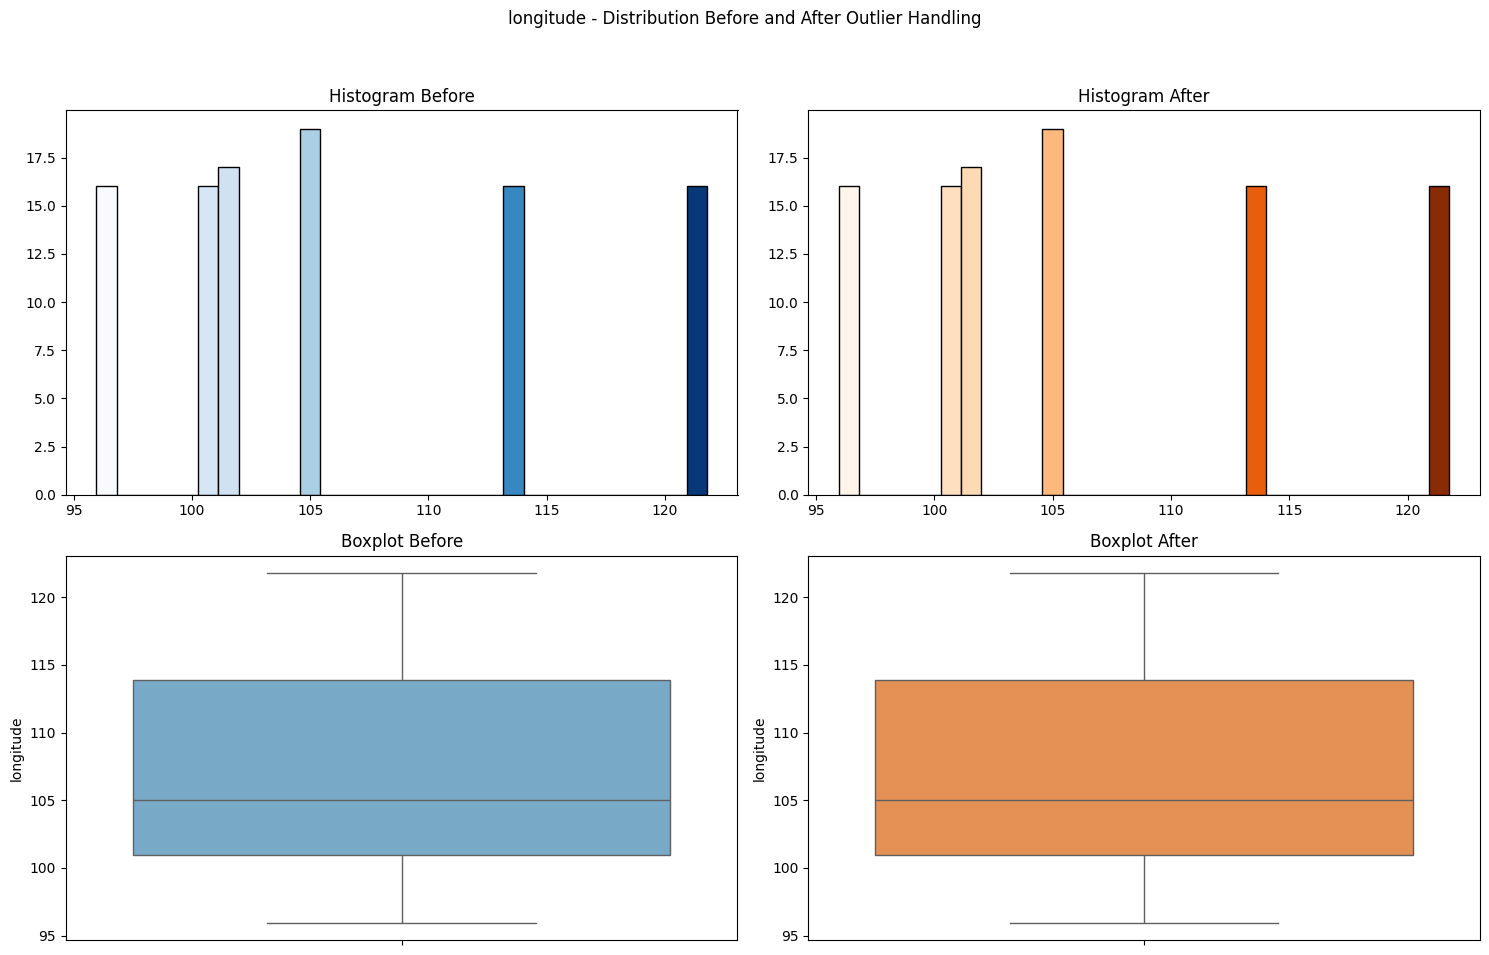

In [69]:
# Using the Function
num_cols = numeric_columns
for col in num_cols:
    outlier_handling_plot_comparison(X_train_clean, X_train_capped, col)

#### **Feature Selection**

Feature selection is an important step in building a good machine learning model. By looking at the correlation between each feature and the target variable, we can identify which features are most important for making predictions. 

Features with a high positive or negative correlation to the target variable are considered significant and are selected for training the model. 

This helps improve the model's accuracy and efficiency by focusing only on the most relevant information, reducing noise, and preventing overfitting. Ultimately, this process leads to better performance and generalization on new, unseen data.

In [70]:
X_train_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   entity                                                            100 non-null    object 
 1   year                                                              100 non-null    int64  
 2   access-to-electricity-(%-of-population)                           100 non-null    float64
 3   access-to-clean-fuels-for-cooking                                 100 non-null    float64
 4   renewable-electricity-generating-capacity-per-capita              100 non-null    float64
 5   financial-flows-to-developing-countries-(us-$)                    100 non-null    float64
 6   renewable-energy-share-in-the-total-final-energy-consumption-(%)  100 non-null    float64
 7   low-carbon-electricity-(%-electricit

But since we have two targets  `y_train_fossil` and `y_train_renewables`, we will do a little bit of looping so that we can be sure that all columns resulting from our correlation tests are correlated in both targets

In [71]:
#Define numerical continuus value columns
continuous_cols = X_train_capped.select_dtypes(include=['float64']).columns.tolist()
continuous_cols

['access-to-electricity-(%-of-population)',
 'access-to-clean-fuels-for-cooking',
 'renewable-electricity-generating-capacity-per-capita',
 'financial-flows-to-developing-countries-(us-$)',
 'renewable-energy-share-in-the-total-final-energy-consumption-(%)',
 'low-carbon-electricity-(%-electricity)',
 'primary-energy-consumption-per-capita-(kwh/person)',
 'energy-intensity-level-of-primary-energy-(mj/$2017-ppp-gdp)',
 'value-co2-emissions-kt-by-country',
 'renewables-(%-equivalent-primary-energy)',
 'gdp-growth',
 'gdp-per-capita',
 'density(p/km2)',
 'land-area(km2)',
 'latitude',
 'longitude']

In [72]:
#Initialize values container
spearman_coef_fossil = []
p_values_fossil = []
correlation_fossil = []
spearman_coef_renewables = []
p_values_renewables = []
correlation_renewables = []

#Loop every column in numerical continuous column for y_train_fossil
for col in continuous_cols:
    corr, pvalue = spearmanr(X_train_capped[col], y_train_fossil)
    spearman_coef_fossil.append(corr)
    p_values_fossil.append(pvalue)
    correlation_fossil.append('Correlated' if pvalue < 0.05 else 'Not Correlated')

#Loop every column in numerical continuous column for y_train_renewables
for col in continuous_cols:
    corr, pvalue = spearmanr(X_train_capped[col], y_train_renewables)
    spearman_coef_renewables.append(corr)
    p_values_renewables.append(pvalue)
    correlation_renewables.append('Correlated' if pvalue < 0.05 else 'Not Correlated')

In [73]:
# Define numerical discrete value columns
discrete_cols = ['year']

#Intialize values containers for Kendall's tau correlation
kendall_coef_fossil = []
p_values_fossil_discrete = []
correlation_fossil_discrete = []
kendall_coef_renewables = []
p_values_renewables_discrete = []
correlation_renewables_discrete = []

#Loop every column in numerical discrete columns for y_train_renewables
for cor in discrete_cols:
    corr, p_value = kendalltau(X_train_capped[col], y_train_renewables)
    kendall_coef_renewables.append(corr)
    p_values_renewables_discrete.append(pvalue)
    correlation_renewables_discrete.append('Correlated' if pvalue < 0.05 else 'Not Correlated')

#Loop every column in numerical discrete columns for y_train_renewables
for cor in discrete_cols:
    corr, p_value = kendalltau(X_train_capped[col], y_train_fossil)
    kendall_coef_fossil.append(corr)
    p_values_fossil_discrete.append(pvalue)
    correlation_fossil_discrete.append('Correlated' if pvalue < 0.05 else 'Not Correlated')

In [74]:
#Create dataframes for continuous and discrete columns correlation result
X_train_continuous = pd.DataFrame({
    'continuous_columns' : continuous_cols,
    'spearman_coef_fossil' : spearman_coef_fossil,
    'p_values_fossil' : p_values_fossil,
    'correlation_fossil' : correlation_fossil,
    'spearman_coef_renewables' : spearman_coef_renewables,
    'p_values_renewables' : p_values_renewables,
    'correlation_renewables' : correlation_renewables
})

X_train_discrete = pd.DataFrame({
    'discrete_columns' : discrete_cols,
    'kendall_coef_fossil' : kendall_coef_fossil,
    'p_values_fossil_discrete' : p_values_fossil_discrete,
    'correlation_fossil_discrete' : correlation_fossil_discrete,
    'kendall_coef_renewables' : kendall_coef_renewables,
    'p_values_renewables_discrete' : p_values_renewables_discrete,
    'correlation_renewables_discrete' : correlation_renewables_discrete
})


#Extract features based on their correlation status

not_correlated_both = X_train_continuous[
    (X_train_continuous['correlation_fossil'] == 'Not Correlated') &
    (X_train_continuous['correlation_renewables'] == 'Not Correlated')
]['continuous_columns'].tolist()

correlated_both = X_train_continuous[
    (X_train_continuous['correlation_fossil'] == 'Correlated') &
    (X_train_continuous['correlation_renewables'] == 'Correlated')
]['continuous_columns'].tolist()

not_correlated_both_discrete = X_train_discrete[
    (X_train_discrete['correlation_fossil_discrete'] == 'Not Correlated') &
    (X_train_discrete['correlation_renewables_discrete'] == 'Not Correlated')
]['discrete_columns'].tolist()

correlated_both_discrete = X_train_discrete[
    (X_train_discrete['correlation_fossil_discrete'] == 'Correlated') &
    (X_train_discrete['correlation_renewables_discrete'] == 'Correlated')
]['discrete_columns'].tolist()

# Determine the maximum length of the lists
max_length = max(len(not_correlated_both), len(correlated_both), len(not_correlated_both_discrete), len(correlated_both_discrete))

# Pad the shorter lists with None
not_correlated_both += [None] * (max_length - len(not_correlated_both))
correlated_both += [None] * (max_length - len(correlated_both))
not_correlated_both_discrete += [None] * (max_length - len(not_correlated_both_discrete))
correlated_both_discrete += [None] * (max_length - len(correlated_both_discrete))

#Summary table
summary_table = pd.DataFrame({
    'Not Correlated (Both)' : not_correlated_both + not_correlated_both_discrete,
    'Correlated (Both)' : correlated_both + correlated_both_discrete
})

#Display the summary table
summary_table

,Not Correlated (Both),Correlated (Both)
0,None,access-to-electricity-(%-of-population)
1,None,access-to-clean-fuels-for-cooking
2,None,renewable-electricity-generating-capacity-per-capita
3,None,renewable-energy-share-in-the-total-final-energy-consumption-(%)
4,None,primary-energy-consumption-per-capita-(kwh/person)
5,None,value-co2-emissions-kt-by-country
6,None,renewables-(%-equivalent-primary-energy)
7,None,gdp-growth
8,None,gdp-per-capita
9,None,density(p/km2)


So we see here out from 19 initial features that we have, only 13 of them are both correlated to `y_train_renewables` and `y_train_fossil` . We will first drop the 5 uncorrelated columns

In [75]:
# Combine all correlated features and remove None values
all_correlated = list(set(correlated_both + correlated_both_discrete))
all_correlated = [col for col in all_correlated if col is not None] #Since we previously padded the columns, we will check if the value is None or not

# Keep only the correlated features in the training and testing data
X_train_capped_correlated = X_train_capped[all_correlated]
X_test_capped_correlated = X_test_capped[all_correlated]

# Display the retained columns and the new shape of the datasets
print("Retained Columns: ", all_correlated)
print("New Shape of X_train_capped: ", X_train_capped_correlated.shape)
print("New Shape of X_test_capped: ", X_test_capped_correlated.shape)


Retained Columns:  ['renewable-energy-share-in-the-total-final-energy-consumption-(%)', 'year', 'value-co2-emissions-kt-by-country', 'renewables-(%-equivalent-primary-energy)', 'latitude', 'primary-energy-consumption-per-capita-(kwh/person)', 'access-to-clean-fuels-for-cooking', 'gdp-growth', 'renewable-electricity-generating-capacity-per-capita', 'gdp-per-capita', 'density(p/km2)', 'access-to-electricity-(%-of-population)', 'land-area(km2)']
New Shape of X_train_capped:  (100, 13)
New Shape of X_test_capped:  (26, 13)


In [76]:
X_train_capped_correlated.head()

,renewable-energy-share-in-the-total-final-energy-consumption-(%),year,value-co2-emissions-kt-by-country,renewables-(%-equivalent-primary-energy),latitude,primary-energy-consumption-per-capita-(kwh/person),access-to-clean-fuels-for-cooking,gdp-growth,renewable-electricity-generating-capacity-per-capita,gdp-per-capita,density(p/km2),access-to-electricity-(%-of-population),land-area(km2)
0,60.63,2015,8430.000305,0.000000,12.565679,2299.2490,20.30,6.965798,62.79,1162.904995,95.0,64.910420,181035.0
1,80.47,2004,10149.999620,0.000000,21.916221,1285.3595,4.10,11.167931,9.38,193.368766,83.0,46.230118,676578.0
2,26.73,2019,145419.998200,10.227248,12.879721,5104.3910,46.50,6.118526,62.55,3485.340844,235.0,95.645080,300000.0
3,0.00,2020,0.000000,0.000000,21.916221,3183.1047,31.25,3.173774,63.36,1467.604281,83.0,70.397194,676578.0
4,0.00,2020,0.000000,0.000000,12.565679,3918.6375,36.80,0.478525,95.03,1543.669258,95.0,86.400000,181035.0


I see that we have latitude in our current dataframe. However we do not have longitude as it was dropped previously.


Since latitude by itself lacks any information to be given in our data context, I will drop `latitude`

In [77]:
X_train_capped_correlated.drop('latitude', axis=1, inplace=True)
X_test_capped_correlated.drop('latitude', axis=1, inplace=True)

Now after we have dropped `latitude` I will continue with the Feature Selection

To ensure that there is no multicollinearity happening between our columns, I will further do a feature selection by checking the VIF on the remaining columns that we have

As per statsmodels' recommendation:

*"One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this."*

We'll see how collinear our features are by observing their vif score

In [78]:
#VIF Data Container
vif = []

num_features = X_train_capped_correlated.select_dtypes(include='float64').columns.values

for i in range (len(num_features)):
    vif.append(variance_inflation_factor(X_test_capped_correlated[num_features].values, i))

#Show selected features vif
display(pd.DataFrame({
    'Columns' : num_features,
    'vif' : vif
}))

,Columns,vif
0,renewable-energy-share-in-the-total-final-energy-consumption-(%),90.938609
1,value-co2-emissions-kt-by-country,75.425759
2,renewables-(%-equivalent-primary-energy),132.171655
3,primary-energy-consumption-per-capita-(kwh/person),57.734288
4,access-to-clean-fuels-for-cooking,106.602341
5,gdp-growth,25.403822
6,renewable-electricity-generating-capacity-per-capita,54.823181
7,gdp-per-capita,65.623245
8,density(p/km2),571.306104
9,access-to-electricity-(%-of-population),714.426170


From the multicollinearity check, it can be seen that lots of our data has high VIF value.

If we go back to the definitions of each column, we can see that :

- **Density and access-to-electricity-(%-of-population)** probably will give similar information
- **renewables-(%-equivalent-primary-energy) and renewable-energy-share-in-the-total-final-energy-consumption-(%)** probably also will give similar information
- **gdp-per-capita and gdp-growth** also share similar information
- and I don't think **access-to-clean-fuels-for-cooking** is relevant to our current model

So I will drop access-to-electricity-(%-of-population), renewables-(%-equivalent-primary-energy), gdp-growth, and access-to-clean-fuels-for-cooking and re check the VIF calculation

In [79]:
X_train_capped_correlated.drop(['access-to-electricity-(%-of-population)', 'renewables-(%-equivalent-primary-energy)', 'gdp-growth', 'access-to-clean-fuels-for-cooking'], axis=1, inplace=True)
X_test_capped_correlated.drop(['access-to-electricity-(%-of-population)', 'renewables-(%-equivalent-primary-energy)', 'gdp-growth', 'access-to-clean-fuels-for-cooking'], axis=1, inplace=True)


In [80]:
#VIF Data Container
vif = []

num_features = X_train_capped_correlated.select_dtypes(include='float64').columns.values

for i in range (len(num_features)):
    vif.append(variance_inflation_factor(X_train_capped_correlated[num_features].values, i))

#Show selected features vif
display(pd.DataFrame({
    'Columns' : num_features,
    'vif' : vif
}))

,Columns,vif
0,renewable-energy-share-in-the-total-final-energy-consumption-(%),3.251411
1,value-co2-emissions-kt-by-country,8.636893
2,primary-energy-consumption-per-capita-(kwh/person),16.639004
3,renewable-electricity-generating-capacity-per-capita,14.645414
4,gdp-per-capita,24.514727
5,density(p/km2),5.591038
6,land-area(km2),8.152458


Although there are some of our features still have high VIF, but judging from the correlation of each features I think we can keep these columns.

Now we will append back our train and test set with the `entity` column

In [81]:
X_train_capped_correlated['entity'] = X_train_capped['entity']
X_test_capped_correlated['entity'] = X_test_capped['entity']

In [82]:
X_train_capped_correlated.head()

,renewable-energy-share-in-the-total-final-energy-consumption-(%),year,value-co2-emissions-kt-by-country,primary-energy-consumption-per-capita-(kwh/person),renewable-electricity-generating-capacity-per-capita,gdp-per-capita,density(p/km2),land-area(km2),entity
0,60.63,2015,8430.000305,2299.2490,62.79,1162.904995,95.0,181035.0,Cambodia
1,80.47,2004,10149.999620,1285.3595,9.38,193.368766,83.0,676578.0,Myanmar
2,26.73,2019,145419.998200,5104.3910,62.55,3485.340844,235.0,300000.0,Philippines
3,0.00,2020,0.000000,3183.1047,63.36,1467.604281,83.0,676578.0,Myanmar
4,0.00,2020,0.000000,3918.6375,95.03,1543.669258,95.0,181035.0,Cambodia


In [83]:
#Rename the DataFrame
X_train_corr = X_train_capped_correlated.copy()
X_test_corr = X_test_capped_correlated.copy()

X_train_corr.head()

,renewable-energy-share-in-the-total-final-energy-consumption-(%),year,value-co2-emissions-kt-by-country,primary-energy-consumption-per-capita-(kwh/person),renewable-electricity-generating-capacity-per-capita,gdp-per-capita,density(p/km2),land-area(km2),entity
0,60.63,2015,8430.000305,2299.2490,62.79,1162.904995,95.0,181035.0,Cambodia
1,80.47,2004,10149.999620,1285.3595,9.38,193.368766,83.0,676578.0,Myanmar
2,26.73,2019,145419.998200,5104.3910,62.55,3485.340844,235.0,300000.0,Philippines
3,0.00,2020,0.000000,3183.1047,63.36,1467.604281,83.0,676578.0,Myanmar
4,0.00,2020,0.000000,3918.6375,95.03,1543.669258,95.0,181035.0,Cambodia


#### **Feature Encoding**

Since we will try to use ARIMA in our model, and ARIMA in nature uses regression as its calculation, it only takes `numbers` as its input.

So, we will encode our categorical feature to their numerical form, hence  `encoding`

In [84]:
#Checking cardinality
X_train_corr['entity'].nunique()

6

Since the cardinality in our `entity` column are not too high (only six unique values) and they are not ordinal categorical values, we will use `OneHotEncoder` to proceed with this process

In [85]:
X_train_cat = X_train_corr[['entity']].copy()
X_test_cat = X_test_corr[['entity']].copy()


In [86]:
X_train_cat.head()

,entity
0,Cambodia
1,Myanmar
2,Philippines
3,Myanmar
4,Cambodia


In [87]:
#encoder model definition
encoder = OneHotEncoder(sparse_output= False, handle_unknown= 'ignore')

#Fit and transform the encoder
X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

encoded_columns = encoder.get_feature_names_out(input_features=X_train_cat.columns)


#### **Scaling**

For this particular project, since we are using ARIMA and in nature as it is part of regression algorithm family, it will assume our model is normal in distribution.

Thus I will try to use `StandardScaler`

And I will append back my encoded `entity` column to my numerical columns before I scale all of them

In [88]:
#Get only numerical features
X_train_num = X_train_corr.select_dtypes(include='number').copy()
X_test_num = X_test_corr.select_dtypes(include='number').copy()


In [89]:
#Concatenate encoded categorical variables and numerical variables

X_train_con = np.concatenate([X_train_encoded, X_train_num], axis=1)
X_test_con = np.concatenate([X_test_encoded, X_test_num], axis=1)

#Concatenate column names for dataframe
column_names = np.concatenate([encoded_columns, X_train_num.columns])

#Create DataFrame with column names
X_train_enc = pd.DataFrame(X_train_con, columns=column_names)
X_test_enc = pd.DataFrame(X_test_con, columns=column_names)

In [90]:
X_train_enc.head()

,entity_Cambodia,entity_Indonesia,entity_Malaysia,entity_Myanmar,entity_Philippines,entity_Thailand,renewable-energy-share-in-the-total-final-energy-consumption-(%),year,value-co2-emissions-kt-by-country,primary-energy-consumption-per-capita-(kwh/person),renewable-electricity-generating-capacity-per-capita,gdp-per-capita,density(p/km2),land-area(km2)
0,1.0,0.0,0.0,0.0,0.0,0.0,60.63,2015.0,8430.000305,2299.2490,62.79,1162.904995,95.0,181035.0
1,0.0,0.0,0.0,1.0,0.0,0.0,80.47,2004.0,10149.999620,1285.3595,9.38,193.368766,83.0,676578.0
2,0.0,0.0,0.0,0.0,1.0,0.0,26.73,2019.0,145419.998200,5104.3910,62.55,3485.340844,235.0,300000.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.00,2020.0,0.000000,3183.1047,63.36,1467.604281,83.0,676578.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.00,2020.0,0.000000,3918.6375,95.03,1543.669258,95.0,181035.0


In [91]:
#Initialize the StandardScaler
scaler = StandardScaler()

#Fit and transform
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [92]:
X_train_scaled

array([[ 2.0647416 , -0.43643578, -0.45256964, ..., -0.7193064 ,
        -0.72408457, -0.98826249],
       [-0.4843221 , -0.43643578, -0.45256964, ..., -1.09547823,
        -0.95994274,  0.4254222 ],
       [-0.4843221 , -0.43643578, -0.45256964, ...,  0.18177901,
         2.02759405, -0.64887923],
       ...,
       [-0.4843221 , -0.43643578,  2.2096047 , ...,  0.44576272,
        -0.64546519, -0.56373173],
       [ 2.0647416 , -0.43643578, -0.45256964, ..., -1.01200385,
        -0.72408457, -0.98826249],
       [-0.4843221 , -0.43643578, -0.45256964, ...,  1.10335223,
         0.10141901, -0.04089065]])

In [93]:
#Create DataFrame with column names
X_train_final = pd.DataFrame(X_train_scaled, columns=column_names)
X_test_final = pd.DataFrame(X_test_scaled, columns=column_names)

In [94]:
X_train_final.head()

,entity_Cambodia,entity_Indonesia,entity_Malaysia,entity_Myanmar,entity_Philippines,entity_Thailand,renewable-energy-share-in-the-total-final-energy-consumption-(%),year,value-co2-emissions-kt-by-country,primary-energy-consumption-per-capita-(kwh/person),renewable-electricity-generating-capacity-per-capita,gdp-per-capita,density(p/km2),land-area(km2)
0,2.064742,-0.436436,-0.45257,-0.436436,-0.436436,-0.436436,0.849019,0.795978,-0.947408,-0.737686,0.017010,-0.719306,-0.724085,-0.988262
1,-0.484322,-0.436436,-0.45257,2.291288,-0.436436,-0.436436,1.576554,-1.001919,-0.935642,-0.826460,-1.168583,-1.095478,-0.959943,0.425422
2,-0.484322,-0.436436,-0.45257,-0.436436,2.291288,-0.436436,-0.394097,1.449759,-0.010315,-0.492074,0.011683,0.181779,2.027594,-0.648879
3,-0.484322,-0.436436,-0.45257,2.291288,-0.436436,-0.436436,-1.374289,1.613204,-1.005074,-0.660298,0.029663,-0.601086,-0.959943,0.425422
4,2.064742,-0.436436,-0.45257,-0.436436,-0.436436,-0.436436,-1.374289,1.613204,-1.005074,-0.595896,0.732672,-0.571573,-0.724085,-0.988262


### **Model Building**

In [95]:
# Define the p, d, and q parameters to take any value between 0 and 5
p = d = q = range(0, 6)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Fit SARIMAX model for y_train_fossil
best_aic = np.inf
best_order = None

for param in pdq:
    try:
        model = SARIMAX(y_train_fossil, exog=X_train_final, order=param)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = param
    except:
        continue

# Get the best order for SARIMAX model for y_train_fossil
order_model_train_fossil = best_order

In [113]:
import pandas as pd

# Ensure the indices of y_train_fossil and X_train_final are aligned
y_train_fossil.index = X_train_final.index

# Fit SARIMAX model for y_train_fossil with the obtained order
model_fossil = SARIMAX(y_train_fossil, exog=X_train_final, order=order_model_train_fossil, random_state=42)
fitted_model_fossil = model_fossil.fit()

# Predict y_train_fossil
y_train_fossil_pred = fitted_model_fossil.predict()

# Predict y_test_fossil
# Ensure X_test_final has the same number of rows as y_test_fossil
X_test_final_trimmed = X_test_final.iloc[:len(y_test_fossil)]
X_test_final_trimmed.index = y_test_fossil.index  # Align the indices
y_test_fossil_pred = fitted_model_fossil.forecast(steps=len(y_test_fossil), exog=X_test_final_trimmed)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22915D+00    |proj g|=  4.07639D-01

At iterate    5    f=  4.07140D+00    |proj g|=  6.42737D-02

At iterate   10    f=  4.05187D+00    |proj g|=  5.64092D-02

At iterate   15    f=  4.03905D+00    |proj g|=  1.75458D-02

At iterate   20    f=  4.03032D+00    |proj g|=  1.86131D-02

At iterate   25    f=  4.02837D+00    |proj g|=  1.00039D-02

At iterate   30    f=  4.02631D+00    |proj g|=  4.36905D-02

At iterate   35    f=  4.01657D+00    |proj g|=  3.36918D-02

At iterate   40    f=  4.01086D+00    |proj g|=  7.31947D-02

At iterate   45    f=  4.00504D+00    |proj g|=  1.85821D-02

At iterate   50    f=  3.99960D+00    |proj g|=  3.77168D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


  Tnint  Skip  Nact     Projg        F
   22     50     58      1     0     0   3.772D-02   4.000D+00
  F =   3.9996024583908305     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


Training Set Metrics:
Mean Absolute Error (MAE): 11.033759606801038
Root Mean Squared Error (RMSE): 15.204888896673788
R2 Score: 0.9480156049375383

Test Set Metrics:
Mean Absolute Error (MAE): 11.593897378265819
Root Mean Squared Error (RMSE): 13.674052994286727
R2 Score: 0.9596067269289986


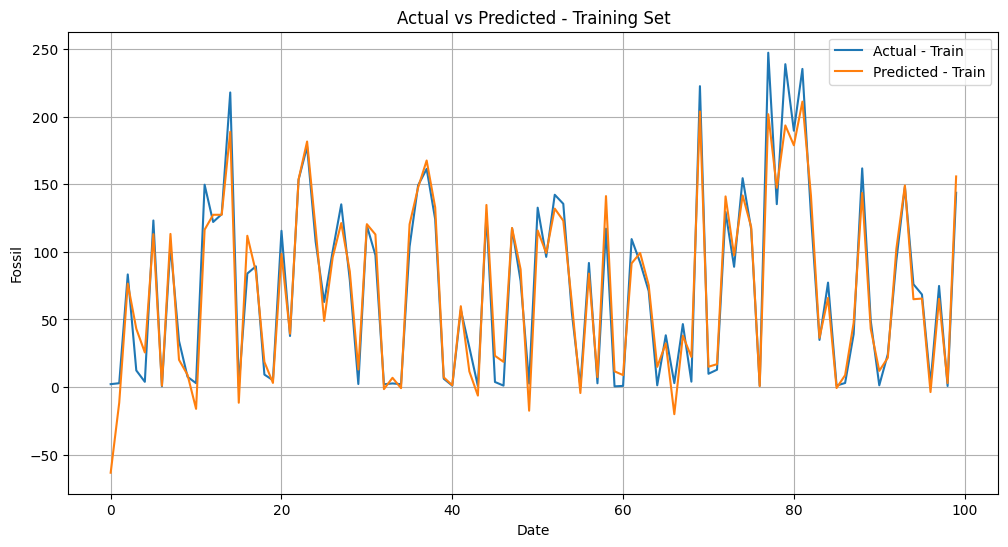

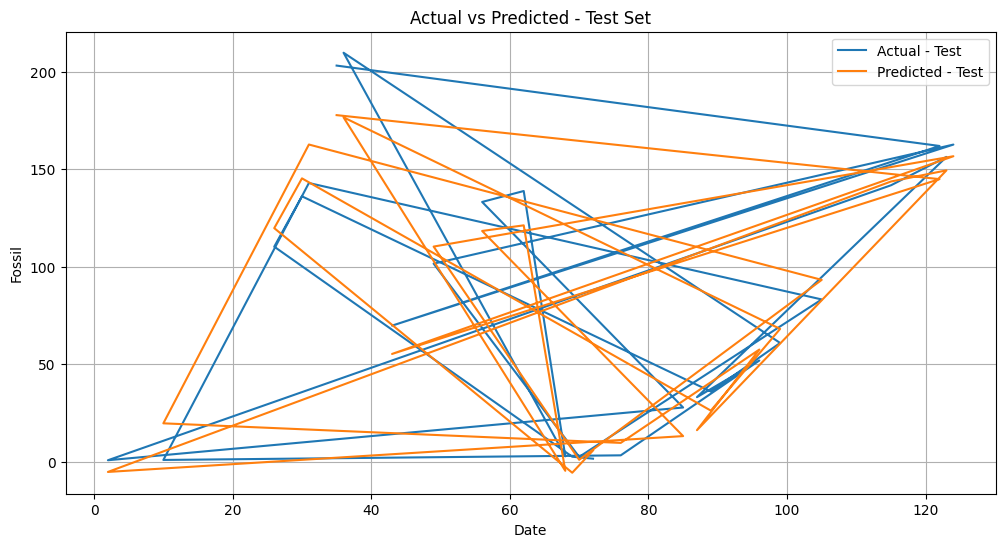

In [114]:
# Evaluate the SARIMAX model on the training set
y_train_fossil_pred = fitted_model_fossil.predict()

# Calculate evaluation metrics for the training set
mae_train = mean_absolute_error(y_train_fossil, y_train_fossil_pred)
mse_train = mean_squared_error(y_train_fossil, y_train_fossil_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_fossil, y_train_fossil_pred)

# Print evaluation metrics for the training set
print("Training Set Metrics:")
print("Mean Absolute Error (MAE):", mae_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R2 Score:", r2_train)

# Evaluate the SARIMAX model on the test set
y_test_fossil_pred = fitted_model_fossil.forecast(steps=len(y_test_fossil), exog=X_test_final_trimmed)

# Calculate evaluation metrics for the test set
mae_test = mean_absolute_error(y_test_fossil, y_test_fossil_pred)
mse_test = mean_squared_error(y_test_fossil, y_test_fossil_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_fossil, y_test_fossil_pred)

# Print evaluation metrics for the test set
print("\nTest Set Metrics:")
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R2 Score:", r2_test)

# Plot actual vs predicted for the training set
plt.figure(figsize=(12, 6))
plt.plot(y_train_fossil.index, y_train_fossil, label='Actual - Train')
plt.plot(y_train_fossil.index, y_train_fossil_pred, label='Predicted - Train')
plt.title('Actual vs Predicted - Training Set')
plt.xlabel('Date')
plt.ylabel('Fossil')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted for the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_fossil.index, y_test_fossil, label='Actual - Test')
plt.plot(y_test_fossil.index, y_test_fossil_pred, label='Predicted - Test')
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Date')
plt.ylabel('Fossil')
plt.legend()
plt.grid(True)
plt.show()
